# 0. Vamos come√ßar nossa aventura pelo oceano dos dados.  
De inicio iremos importar as blibliotecas necess√°rias para nossas an√°lises em Python.

In [ ]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

0.1 Agora vamos fazer o `download` da base de dados, salvar o arquivo no local `/content/banvic_data.zip`, descompactar os arquivos e em uma nova pasta `/content/banvic_data`, verificar seus nomes e quantidade de arquivos descopactados.

In [ ]:
# Baixando o arquivo zip do meu reposit√≥rio do GitHub
!wget https://github.com/Genesio-Moreira87/LH_EA_GENESIO_MOREIRA_COUTINHO_DOS_SANTOS/raw/6181e2621f71962ef71d514dc543bc3bddeb1a63/Dataset/banvic_data.zip -q -O /content/banvic_data.zip

# Caminho do arquivo zip no Google Colab
zip_file_path = "/content/banvic_data.zip"

# Pasta de destino para extra√ß√£o
extract_folder = "/content/banvic_data"

# Criando a pasta de destino se n√£o existir
os.makedirs(extract_folder, exist_ok=True)

# Verificando se o arquivo zip √© v√°lido antes de tentar extrair
if zipfile.is_zipfile(zip_file_path):
    # Abrindo o arquivo zip no modo de leitura
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extraindo todos os arquivos para a pasta de destino
        zip_ref.extractall(extract_folder)

        # Obt√©ndo a lista de nomes de arquivos descompactados
        extracted_files = zip_ref.namelist()

    # Imprimindo uma mensagem indicando que a extra√ß√£o foi conclu√≠da
    print(f"Arquivo '{zip_file_path}' foi descompactado na pasta '{extract_folder}'.")

    # Imprimindo os nomes dos arquivos descompactados
    print("\nArquivos descompactados:")
    for file in extracted_files:
        print(file)

    # Imprimindo a quantidade de arquivos descompactados
    print(f"\nQuantidade de arquivos descompactados: {len(extracted_files)}")
else:
    print(f"O arquivo '{zip_file_path}' n√£o √© um arquivo zip v√°lido.")


Arquivo '/content/banvic_data.zip' foi descompactado na pasta '/content/banvic_data'.

Arquivos descompactados:
agencias.csv
clientes.csv
colaborador_agencia.csv
colaboradores.csv
contas.csv
propostas_credito.csv
transacoes.csv

Quantidade de arquivos descompactados: 7


0.2 Agora que j√° conseguimos  baixar e descompactar nossa base de dados , vamos utilizar a fun√ß√£o `read_csv` do Pandas, para ler os arquivos e salvar em Dataframe `_df`, e seguir com a an√°lise e visualiza√ß√£o dos dados.

In [ ]:
# Caminho dos arquivos descompactados
agencias_path = "/content/banvic_data/agencias.csv"
clientes_path = "/content/banvic_data/clientes.csv"
colaborador_agencia_path = "/content/banvic_data/colaborador_agencia.csv"
colaboradores_path = "/content/banvic_data/colaboradores.csv"
contas_path = "/content/banvic_data/contas.csv"
propostas_credito_path = "/content/banvic_data/propostas_credito.csv"
transacoes_path = "/content/banvic_data/transacoes.csv"

# L√™ cada arquivo CSV em um DataFrame Pandas
agencias_df = pd.read_csv(agencias_path)
clientes_df = pd.read_csv(clientes_path)
colaborador_agencia_df = pd.read_csv(colaborador_agencia_path)
colaboradores_df = pd.read_csv(colaboradores_path)
contas_df = pd.read_csv(contas_path)
propostas_credito_df = pd.read_csv(propostas_credito_path)
transacoes_df = pd.read_csv(transacoes_path)

# Exemplo de uso dos DataFrames
print("Exemplo de DataFrame:")
agencias_df.head()


Exemplo de DataFrame:


cod_agencia              nome  \
0            7   Ag√™ncia Digital   
1            1    Ag√™ncia Matriz   
2            2   Ag√™ncia Tatuap√©   
3            3  Ag√™ncia Campinas   
4            4    Ag√™ncia Osasco   

                                            endereco     cidade  uf  \
0  Av. Paulista, 1436 - Cerqueira C√©sar, S√£o Paul...  S√£o Paulo  SP   
1  Av. Paulista, 1436 - Cerqueira C√©sar, S√£o Paul...  S√£o Paulo  SP   
2  Pra√ßa S√≠lvio Romero, 158 - Tatuap√©, S√£o Paulo ...  S√£o Paulo  SP   
3  Av. Francisco Glic√©rio, 895 - Vila Lidia, Camp...   Campinas  SP   
4  Av. Ant√¥nio Carlos Costa, 1000 - Bela Vista, O...     Osasco  SP   

  data_abertura tipo_agencia  
0    2015-08-01      Digital  
1    2010-01-01       F√≠sica  
2    2010-06-14       F√≠sica  
3    2012-03-04       F√≠sica  
4    2013-11-06       F√≠sica

# 1. Analise & Explora√ß√£o dos Dados

- 1.1.1 Visualizando as quantidade de linhas e colunas dos `df's`, com a fun√ß√£o `shape`.

In [ ]:
# Visualizando a quantidade de linhas e colunas para cada DataFrame
print(f"1- DataFrame Ag√™ncia: agencias_df - Linhas: {agencias_df.shape[0]}, Colunas: {agencias_df.shape[1]}")
print(f"2- DataFrame Clientes: clientes_df - Linhas: {clientes_df.shape[0]}, Colunas: {clientes_df.shape[1]}")
print(f"3- DataFrame Colaborador Ag√™ncia: colaborador_agencia_df - Linhas: {colaborador_agencia_df.shape[0]}, Colunas: {colaborador_agencia_df.shape[1]}")
print(f"4- DataFrame Colaboradores: colaboradores_df - Linhas: {colaboradores_df.shape[0]}, Colunas: {colaboradores_df.shape[1]}")
print(f"5- DataFrame Contas: contas_df - Linhas: {contas_df.shape[0]}, Colunas: {contas_df.shape[1]}")
print(f"6- DataFrame Propostas de Cr√©dito: propostas_credito_df - Linhas: {propostas_credito_df.shape[0]}, Colunas: {propostas_credito_df.shape[1]}")
print(f"7- DataFrame Transa√ß√µes: transacoes_df - Linhas: {transacoes_df.shape[0]}, Colunas: {transacoes_df.shape[1]}")


1- DataFrame Ag√™ncia: agencias_df - Linhas: 10, Colunas: 7
2- DataFrame Clientes: clientes_df - Linhas: 998, Colunas: 10
3- DataFrame Colaborador Ag√™ncia: colaborador_agencia_df - Linhas: 100, Colunas: 2
4- DataFrame Colaboradores: colaboradores_df - Linhas: 100, Colunas: 8
5- DataFrame Contas: contas_df - Linhas: 999, Colunas: 9
6- DataFrame Propostas de Cr√©dito: propostas_credito_df - Linhas: 2000, Colunas: 12
7- DataFrame Transa√ß√µes: transacoes_df - Linhas: 71999, Colunas: 5


- 1.1.2 Visualizando os nomes das `colunas` nos `df's`, com a fun√ß√£o `columns`




In [ ]:
# Obtendo os nomes das colunas para cada DataFrame
print("Ag√™ncias DataFrame - Nomes das Colunas:")
print(agencias_df.columns)

print("\nClientes DataFrame - Nomes das Colunas:")
print(clientes_df.columns)

print("\nColaborador Ag√™ncia DataFrame - Nomes das Colunas:")
print(colaborador_agencia_df.columns)

print("\nColaboradores DataFrame - Nomes das Colunas:")
print(colaboradores_df.columns)

print("\nContas DataFrame - Nomes das Colunas:")
print(contas_df.columns)

print("\nPropostas de Cr√©dito DataFrame - Nomes das Colunas:")
print(propostas_credito_df.columns)

print("\nTransa√ß√µes DataFrame - Nomes das Colunas:")
print(transacoes_df.columns)


Ag√™ncias DataFrame - Nomes das Colunas:
Index(['cod_agencia', 'nome', 'endereco', 'cidade', 'uf', 'data_abertura',
       'tipo_agencia'],
      dtype='object')

Clientes DataFrame - Nomes das Colunas:
Index(['cod_cliente', 'primeiro_nome', 'ultimo_nome', 'email', 'tipo_cliente',
       'data_inclusao', 'cpfcnpj', 'data_nascimento', 'endereco', 'cep'],
      dtype='object')

Colaborador Ag√™ncia DataFrame - Nomes das Colunas:
Index(['cod_colaborador', 'cod_agencia'], dtype='object')

Colaboradores DataFrame - Nomes das Colunas:
Index(['cod_colaborador', 'primeiro_nome', 'ultimo_nome', 'email', 'cpf',
       'data_nascimento', 'endereco', 'cep'],
      dtype='object')

Contas DataFrame - Nomes das Colunas:
Index(['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador',
       'tipo_conta', 'data_abertura', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento'],
      dtype='object')

Propostas de Cr√©dito DataFrame - Nomes das Colunas:
Index(['cod_proposta', 'cod_clie

- 1.1.3 Agora vamos continuar a explora√ß√£o dos dados, e visualizar o `tipo de dados` dos `df's`, com metodo python  `dtypes`.

In [ ]:
# Visualizando os tipos de dados das colunas para cada DataFrame
print("Ag√™ncias DataFrame - Tipos de Dados:")
print(agencias_df.dtypes)

print("\nClientes DataFrame - Tipos de Dados:")
print(clientes_df.dtypes)

print("\nColaborador Ag√™ncia DataFrame - Tipos de Dados:")
print(colaborador_agencia_df.dtypes)

print("\nColaboradores DataFrame - Tipos de Dados:")
print(colaboradores_df.dtypes)

print("\nContas DataFrame - Tipos de Dados:")
print(contas_df.dtypes)

print("\nPropostas de Cr√©dito DataFrame - Tipos de Dados:")
print(propostas_credito_df.dtypes)

print("\nTransa√ß√µes DataFrame - Tipos de Dados:")
print(transacoes_df.dtypes)


Ag√™ncias DataFrame - Tipos de Dados:
cod_agencia       int64
nome             object
endereco         object
cidade           object
uf               object
data_abertura    object
tipo_agencia     object
dtype: object

Clientes DataFrame - Tipos de Dados:
cod_cliente         int64
primeiro_nome      object
ultimo_nome        object
email              object
tipo_cliente       object
data_inclusao      object
cpfcnpj            object
data_nascimento    object
endereco           object
cep                object
dtype: object

Colaborador Ag√™ncia DataFrame - Tipos de Dados:
cod_colaborador    int64
cod_agencia        int64
dtype: object

Colaboradores DataFrame - Tipos de Dados:
cod_colaborador     int64
primeiro_nome      object
ultimo_nome        object
email              object
cpf                object
data_nascimento    object
endereco           object
cep                object
dtype: object

Contas DataFrame - Tipos de Dados:
num_conta                   int64
cod_cliente        

- 1.1.4 Ser√° que a base de dados possui `valores Nulos` ?  
Utilizaremos o a fun√ß√£o `isnull()` do python.

In [ ]:
# Verifica se h√° valores nulos para cada DataFrame
print("Ag√™ncias DataFrame - Valores Nulos:")
print(agencias_df.isnull().sum())

print("\nClientes DataFrame - Valores Nulos:")
print(clientes_df.isnull().sum())

print("\nColaborador Ag√™ncia DataFrame - Valores Nulos:")
print(colaborador_agencia_df.isnull().sum())

print("\nColaboradores DataFrame - Valores Nulos:")
print(colaboradores_df.isnull().sum())

print("\nContas DataFrame - Valores Nulos:")
print(contas_df.isnull().sum())

print("\nPropostas de Cr√©dito DataFrame - Valores Nulos:")
print(propostas_credito_df.isnull().sum())

print("\nTransa√ß√µes DataFrame - Valores Nulos:")
print(transacoes_df.isnull().sum())


Ag√™ncias DataFrame - Valores Nulos:
cod_agencia      0
nome             0
endereco         0
cidade           0
uf               0
data_abertura    0
tipo_agencia     0
dtype: int64

Clientes DataFrame - Valores Nulos:
cod_cliente        0
primeiro_nome      0
ultimo_nome        0
email              0
tipo_cliente       0
data_inclusao      0
cpfcnpj            0
data_nascimento    0
endereco           0
cep                0
dtype: int64

Colaborador Ag√™ncia DataFrame - Valores Nulos:
cod_colaborador    0
cod_agencia        0
dtype: int64

Colaboradores DataFrame - Valores Nulos:
cod_colaborador    0
primeiro_nome      0
ultimo_nome        0
email              0
cpf                0
data_nascimento    0
endereco           0
cep                0
dtype: int64

Contas DataFrame - Valores Nulos:
num_conta                 0
cod_cliente               0
cod_agencia               0
cod_colaborador           0
tipo_conta                0
data_abertura             0
saldo_total               0

- Nossa base de dados est√° sem valores nulos. üôÇ
Agora Vamos Seguir com a Explora√ß√£o dos Dados.

1.2 Explora√ß√£o dos Dados

- 4.1 An√°lise Descritiva

- 4.1.1 An√°lise Descritiva:  
`Tipo de conta e quantidade de contas por Ag√™ncias`.


Ag√™ncias em ordem decrescente de porcentagem:
Ag√™ncia 7: 460 contas (46.05%)
Ag√™ncia 1: 119 contas (11.91%)
Ag√™ncia 2: 101 contas (10.11%)
Ag√™ncia 3: 76 contas (7.61%)
Ag√™ncia 4: 65 contas (6.51%)
Ag√™ncia 5: 61 contas (6.11%)
Ag√™ncia 6: 52 contas (5.21%)
Ag√™ncia 8: 30 contas (3.00%)
Ag√™ncia 9: 30 contas (3.00%)
Ag√™ncia 10: 5 contas (0.50%)

Quantidade total de contas em todas as ag√™ncias: 999



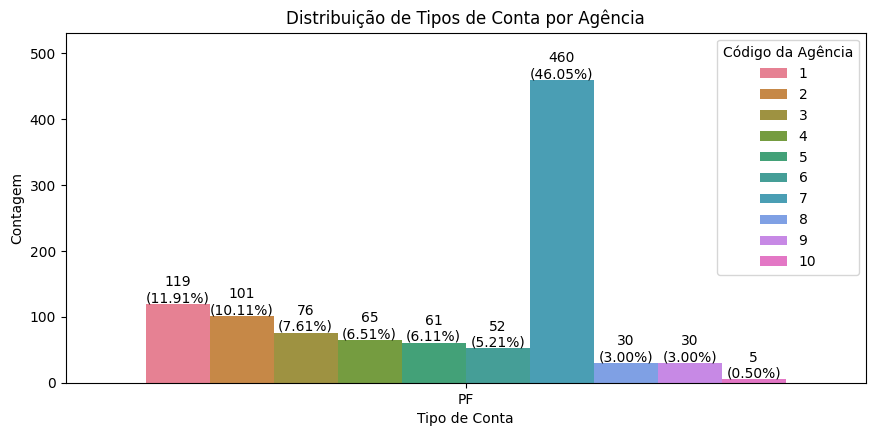

In [ ]:
# Criar o gr√°fico de contagem de tipos de conta por ag√™ncia
plt.figure(figsize=(10, 5))
palette = sns.color_palette("husl", n_colors=len(contas_df['cod_agencia'].unique()))
ax = sns.countplot(x='tipo_conta', hue='cod_agencia', data=contas_df, palette=palette)

total_contas = len(contas_df)  # Calcula o total de contas em vez de total de ag√™ncias
for p in ax.patches:
    count = int(p.get_height())
    if count > 0:
        percentage = count / total_contas * 100
        cod_agencia = contas_df['cod_agencia'].unique()[int(p.get_x())]
        ax.annotate(f'{count}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribui√ß√£o de Conta por Ag√™ncia')
plt.xlabel('Tipo de Conta')
plt.ylabel('Contagem')

plt.ylim(bottom=0, top=plt.ylim()[1] * 1.1)
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

ax.set(xlabel='Tipo de Conta', ylabel='Contagem', title='Distribui√ß√£o de Tipos de Conta por Ag√™ncia')
ax.legend(title='C√≥digo da Ag√™ncia')

# Adicione esta linha para imprimir a quantidade total de contas
#print(f"Quantidade total de contas em todas as ag√™ncias: {total_contas}")
print()

# Criar uma lista para armazenar as informa√ß√µes sobre as ag√™ncias
informacoes_agencias = []

# Preencher a lista com as informa√ß√µes sobre as ag√™ncias
for cod_agencia, subset in contas_df.groupby('cod_agencia'):
    quantidade_contas = len(subset)
    porcentagem_contas = quantidade_contas / total_contas * 100
    informacoes_agencias.append((cod_agencia, quantidade_contas, porcentagem_contas))

# Ordenar a lista em ordem decrescente de porcentagem
informacoes_agencias = sorted(informacoes_agencias, key=lambda x: x[2], reverse=True)

# Imprimir as informa√ß√µes sobre as ag√™ncias em ordem decrescente de porcentagem
print("Ag√™ncias em ordem decrescente de porcentagem:")
for cod_agencia, quantidade_contas, porcentagem_contas in informacoes_agencias:
    print(f"Ag√™ncia {cod_agencia}: {quantidade_contas} contas ({porcentagem_contas:.2f}%)")

# Adicione esta linha para imprimir a quantidade total de contas
print(f"\nQuantidade total de contas em todas as ag√™ncias: {total_contas}")
print()

# Salvando o gr√°fico com o nome do t√≠tulo
plt.savefig(f'{ax.get_title()}.png')

plt.show()


- Nessa an√°lise Verificamos que a Ag√™ncia de c√≥digo `7`, tem 460 contas, cerca de `46.05%`, de todas as contas das `10` Ag√™ncias.

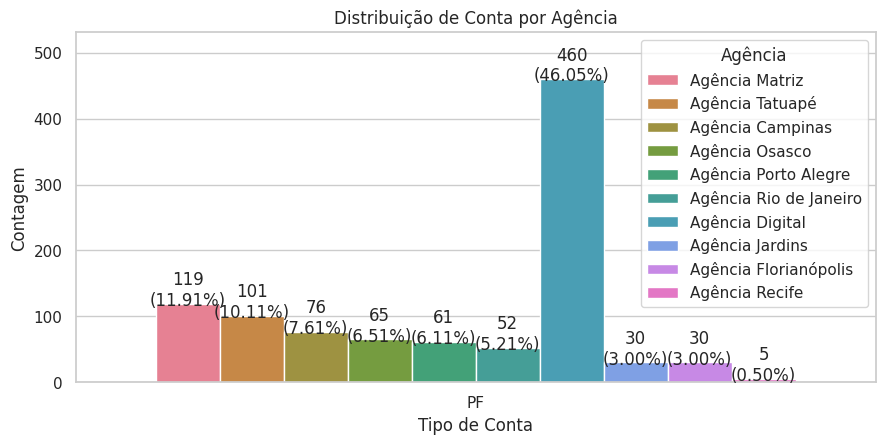

In [ ]:
# Criar o gr√°fico de contagem de tipos de conta por ag√™ncia
plt.figure(figsize=(10, 5))
palette = sns.color_palette("husl", n_colors=len(contas_df['cod_agencia'].unique()))
ax = sns.countplot(x='tipo_conta', hue='cod_agencia', data=contas_df, palette=palette)

total_contas = len(contas_df)  # Calcula o total de contas em vez de total de ag√™ncias
for p in ax.patches:
    count = int(p.get_height())
    if count > 0:
        percentage = count / total_contas * 100
        cod_agencia = contas_df['cod_agencia'].unique()[int(p.get_x())]
        nome_agencia = nomes_agencias.get(cod_agencia, f'Ag√™ncia {cod_agencia}')  # Obt√©m o nome da ag√™ncia ou usa um padr√£o
        ax.annotate(f'{count}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribui√ß√£o de Conta por Ag√™ncia')
plt.xlabel('Tipo de Conta')
plt.ylabel('Contagem')

plt.ylim(bottom=0, top=plt.ylim()[1] * 1.1)
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

# Substituir a legenda do eixo x pelos nomes das ag√™ncias
handles, labels = ax.get_legend_handles_labels()
labels = [nomes_agencias.get(int(label), label) for label in labels]  # Substituir os c√≥digos pelas ag√™ncias
ax.legend(handles, labels, title='Ag√™ncia')
# Salvando o gr√°fico com o nome do t√≠tulo
plt.savefig(f'{ax.get_title()}.png')
plt.show()


In [ ]:
# Supondo que 'nome' e 'cod_agencia' s√£o as colunas desejadas em agencias_df
valores_unicos_agencia = agencias_df[['cod_agencia', 'nome']].drop_duplicates()

# Imprimir os valores √∫nicos
print("Valores √∫nicos nas colunas 'cod_agencia' e 'nome':")
for index, row in valores_unicos_agencia.iterrows():
    print(f"C√≥digo da Ag√™ncia: {row['cod_agencia']}, Nome da Ag√™ncia: {row['nome']}")


Valores √∫nicos nas colunas 'cod_agencia' e 'nome':
C√≥digo da Ag√™ncia: 7, Nome da Ag√™ncia: Ag√™ncia Digital
C√≥digo da Ag√™ncia: 1, Nome da Ag√™ncia: Ag√™ncia Matriz
C√≥digo da Ag√™ncia: 2, Nome da Ag√™ncia: Ag√™ncia Tatuap√©
C√≥digo da Ag√™ncia: 3, Nome da Ag√™ncia: Ag√™ncia Campinas
C√≥digo da Ag√™ncia: 4, Nome da Ag√™ncia: Ag√™ncia Osasco
C√≥digo da Ag√™ncia: 5, Nome da Ag√™ncia: Ag√™ncia Porto Alegre
C√≥digo da Ag√™ncia: 6, Nome da Ag√™ncia: Ag√™ncia Rio de Janeiro
C√≥digo da Ag√™ncia: 8, Nome da Ag√™ncia: Ag√™ncia Jardins
C√≥digo da Ag√™ncia: 9, Nome da Ag√™ncia: Ag√™ncia Florian√≥polis
C√≥digo da Ag√™ncia: 10, Nome da Ag√™ncia: Ag√™ncia Recife


- 4.1.2 An√°lise Descritiva:  
`Quantidades de Clientes por Faixa Et√°ria Idade`.


Estat√≠sticas Descritivas por Faixa Et√°ria:
              count       mean       std   min   25%   50%   75%   max
faixa_etaria                                                          
0-18           22.0  16.772727  0.428932  16.0  17.0  17.0  17.0  17.0
19-25         109.0  21.137615  2.079298  18.0  19.0  22.0  23.0  24.0
26-35         145.0  29.979310  2.819744  25.0  27.0  31.0  32.0  34.0
36-50         225.0  41.800000  4.236323  35.0  38.0  42.0  45.0  49.0
51-65         229.0  56.908297  4.222472  50.0  53.0  57.0  61.0  64.0
66+           268.0  72.604478  4.804833  65.0  68.0  72.0  77.0  81.0
Distribui√ß√£o de Clientes por Faixa Et√°ria:
Faixa | Quantidade total | Porcentagem
66+ | 268 | 26.85%
51-65 | 229 | 22.95%
36-50 | 225 | 22.55%
26-35 | 145 | 14.53%
19-25 | 109 | 10.92%
0-18 | 22 | 2.20%

Total de Clientes: 998


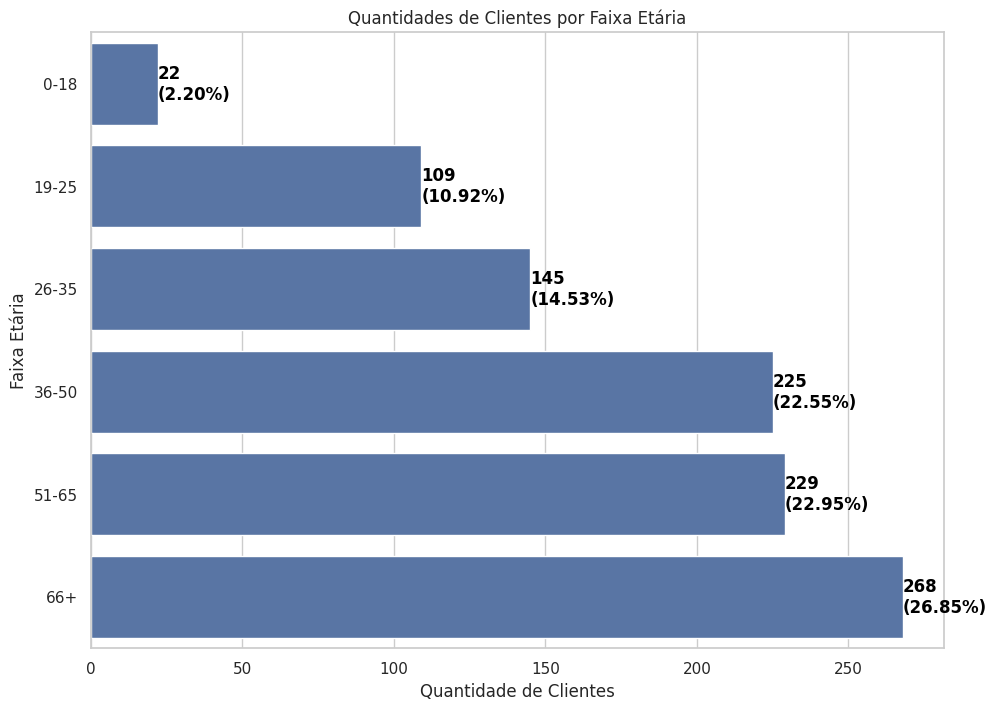

In [ ]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a idade a partir da data de nascimento
hoje = datetime.now()
clientes_df['idade'] = (hoje - pd.to_datetime(clientes_df['data_nascimento'])).astype('<m8[Y]')

# Criando grupos de idades
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '66+']
clientes_df['faixa_etaria'] = pd.cut(clientes_df['idade'], bins=bins, labels=labels, right=False)

# Configurando a altura das barras
sns.set(rc={'figure.figsize':(11, 8)})
sns.set_theme(style="whitegrid")
ax = sns.countplot(y='faixa_etaria', data=clientes_df, order=labels)  # Ajuste a altura da barra aqui
plt.title('Quantidades de Clientes por Faixa Et√°ria')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Faixa Et√°ria')

# Adicionando a quantidade e a porcentagem dentro de cada barra
total_clientes = len(clientes_df)
for p in ax.patches:
    count = int(p.get_width())
    percentage = count / total_clientes * 100
    y_pos = p.get_y() + p.get_height() / 2.
    x_pos = p.get_width()

    # Ajuste a posi√ß√£o x para garantir que a anota√ß√£o fique dentro da moldura do gr√°fico
    if p.get_width() == 5:  # Se for a barra '66+'
        x_pos = min(x_pos, ax.get_xlim()[1] * 0.95)  # Ajuste a posi√ß√£o x
        ax.text(x_pos, y_pos, f'{count}\n({percentage:.2f}%)', ha='left', va='center', fontweight='bold', color='black')
    else:
        ax.text(x_pos, y_pos, f'{count}\n({percentage:.2f}%)', ha='left', va='center', fontweight='bold', color='black')

# Calculando as estat√≠sticas descritivas por faixa et√°ria
estatisticas_por_faixa_etaria = clientes_df.groupby('faixa_etaria')['idade'].describe()
print("\nEstat√≠sticas Descritivas por Faixa Et√°ria:")
print(estatisticas_por_faixa_etaria)

# Calcular a idade a partir da data de nascimento
hoje = datetime.now()
clientes_df['idade'] = (hoje - pd.to_datetime(clientes_df['data_nascimento'])).astype('<m8[Y]')

# Criar grupos de idades
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '66+']
clientes_df['faixa_etaria'] = pd.cut(clientes_df['idade'], bins=bins, labels=labels, right=False)

# Visualizar a distribui√ß√£o por faixa et√°ria
faixa_etaria_counts = clientes_df['faixa_etaria'].value_counts()
total_clientes = len(clientes_df)

# Imprimir a distribui√ß√£o de clientes por faixa et√°ria e a porcentagem
print("Distribui√ß√£o de Clientes por Faixa Et√°ria:")
print("Faixa | Quantidade total | Porcentagem")
for faixa, count in faixa_etaria_counts.items():
    porcentagem = count / total_clientes * 100
    print(f"{faixa} | {count} | {porcentagem:.2f}%")

print("\nTotal de Clientes:", total_clientes)

# Salvar o gr√°fico com o nome do t√≠tulo
plt.savefig(f'{ax.get_title()}.png')


plt.show()

- Existe alguma correla√ß√£o entre idade e saldo das contas?

In [ ]:
# 1. Calcule a idade dos clientes
clientes_df['idade'] = pd.to_datetime('now') - pd.to_datetime(clientes_df['data_nascimento'])
clientes_df['idade'] = clientes_df['idade'].astype('<m8[Y]')  # Convertendo a diferen√ßa em anos

# 2. Junte os DataFrames de Clientes e Contas
clientes_contas = pd.merge(clientes_df, contas_df, on='cod_cliente')

# 3. Calcule a correla√ß√£o entre a idade dos clientes e o saldo_total das contas
correlacao = clientes_contas['idade'].corr(clientes_contas['saldo_disponivel'])

print("Correla√ß√£o entre idade e saldo das contas:", correlacao)


Correla√ß√£o entre idade e saldo das contas: -0.03556373798713127


<ipython-input-8-0da5d6a83589>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  clientes_df['idade'] = pd.to_datetime('now') - pd.to_datetime(clientes_df['data_nascimento'])


4.1.3 An√°lise Descritiva  
`Identificando estat√≠sticas descritivas para a idade dos clientes com base na data de nascimento.`

<ipython-input-29-91456044fe63>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  clientes_df['idade'] = (pd.to_datetime('now') - pd.to_datetime(clientes_df['data_nascimento'])).astype('<m8[Y]')


An√°lise Descritiva da Idade dos Clientes:
count    998.000000
mean      49.013026
std       18.765801
min       16.000000
25%       33.000000
50%       49.000000
75%       66.000000
max       81.000000
Name: idade, dtype: float64



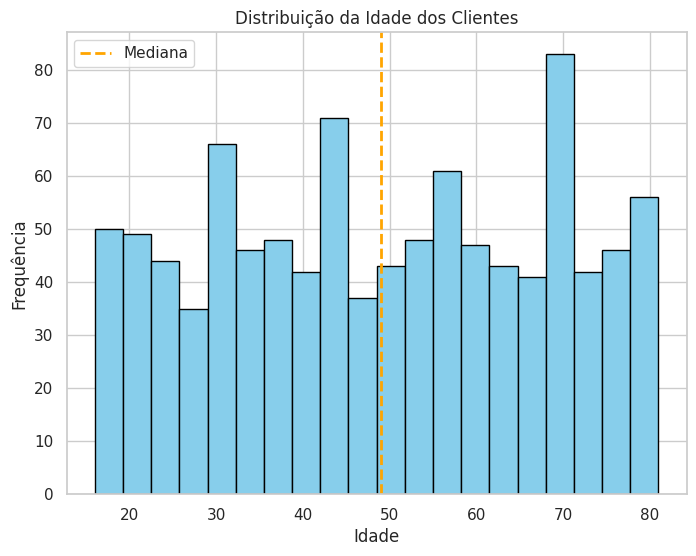

In [ ]:
# Calcular idade com base na data de nascimento
clientes_df['idade'] = (pd.to_datetime('now') - pd.to_datetime(clientes_df['data_nascimento'])).astype('<m8[Y]')

# Estat√≠sticas descritivas para a idade
descritiva_idade = clientes_df['idade'].describe()

# Exibir resultado
print("An√°lise Descritiva da Idade dos Clientes:")
print(descritiva_idade)
print()

# Configura√ß√µes para melhor visualiza√ß√£o do gr√°fico
plt.figure(figsize=(8, 6))
plt.title('Distribui√ß√£o da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')

# Criar histograma
plt.hist(clientes_df['idade'], bins=20, color='skyblue', edgecolor='black')

# Adicionar linhas para m√©dia e mediana
#plt.axvline(clientes_df['idade'].mean(), color='red', linestyle='dashed', linewidth=2, label='M√©dia')
plt.axvline(clientes_df['idade'].median(), color='orange', linestyle='dashed', linewidth=2, label='Mediana')

# Adicionar legenda
plt.legend()

# Salvar o gr√°fico com o nome do t√≠tulo
titulo = plt.gca().get_title()  # Obt√©m o t√≠tulo atual do gr√°fico
nome_arquivo = f"{titulo}.png"  # Concatena o t√≠tulo com a extens√£o do arquivo
plt.savefig(nome_arquivo)

# Exibir o gr√°fico
plt.show()


4.1.4 An√°lise Descritiva  
`Analisando os saldos totais nas ag√™ncias para identificar a m√©dia e a varia√ß√£o.`


An√°lise Descritiva dos Saldos Totais nas Ag√™ncias:
                        count          mean           std        min  \
nome                                                                   
Ag√™ncia Campinas         76.0  25279.805032  32989.782170     4.3416   
Ag√™ncia Digital         460.0  26168.032412  44699.299706     1.2210   
Ag√™ncia Florian√≥polis    30.0  23320.187803  33404.344704    53.1630   
Ag√™ncia Jardins          30.0  16223.089497  28949.987087    20.2554   
Ag√™ncia Matriz          119.0  30964.279215  39126.988838    18.4250   
Ag√™ncia Osasco           65.0  22967.100474  30855.341846     6.0864   
Ag√™ncia Porto Alegre     61.0  27911.073703  38257.025454    20.8608   
Ag√™ncia Recife            5.0  23168.514140  24457.283756  7847.4165   
Ag√™ncia Rio de Janeiro   52.0  23116.812135  52372.171965     1.3081   
Ag√™ncia Tatuap√©         101.0  31424.775668  46116.170178    16.7993   

                                25%          50%           75%       

<ipython-input-7-20119831ace5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='saldo_total', y='nome', data=agencias_df.merge(contas_df, on='cod_agencia'), palette='viridis')
<ipython-input-7-20119831ace5>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(descritiva_saldos_agencias.index)


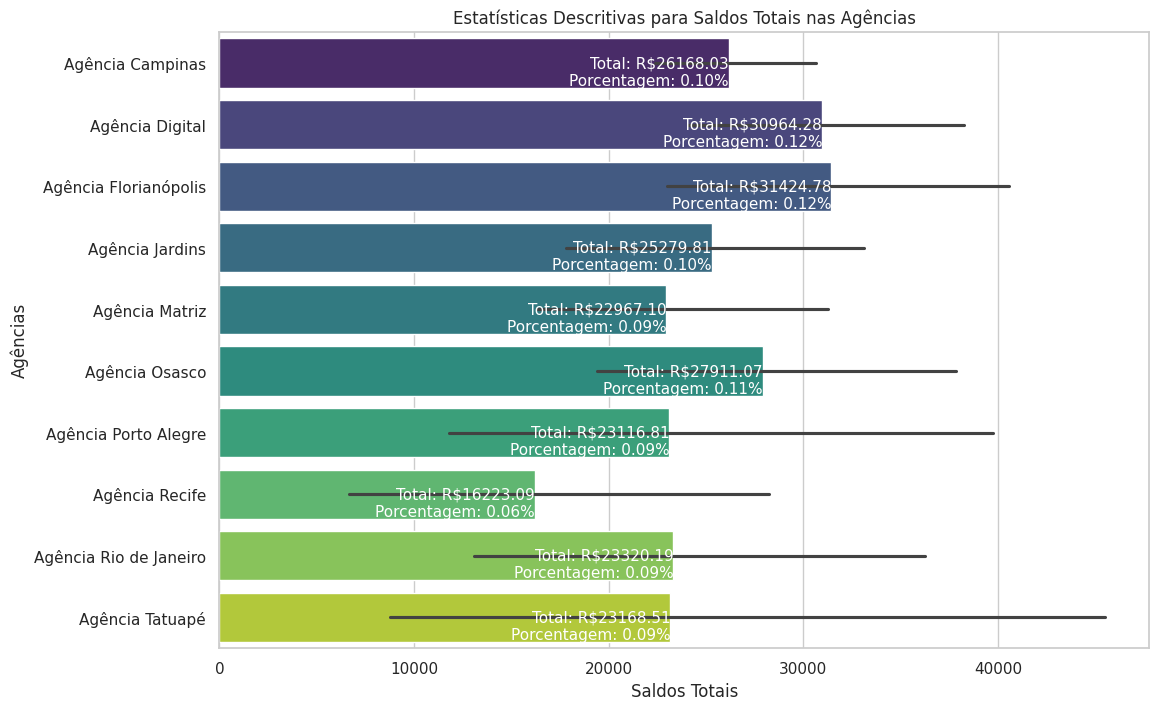

In [ ]:
# Estat√≠sticas descritivas para saldos totais nas ag√™ncias
descritiva_saldos_agencias = agencias_df.merge(contas_df, on='cod_agencia').groupby('nome')['saldo_total'].describe()

# Exibir resultado
print("\nAn√°lise Descritiva dos Saldos Totais nas Ag√™ncias:")
print(descritiva_saldos_agencias)


import seaborn as sns
import matplotlib.pyplot as plt

# Configura√ß√µes para melhor visualiza√ß√£o do gr√°fico
plt.figure(figsize=(12, 8))
plt.title('Estat√≠sticas Descritivas para Saldos Totais nas Ag√™ncias')
plt.xlabel('Saldos Totais')
plt.ylabel('Ag√™ncias')

# Calcular estat√≠sticas descritivas para os saldos totais
descritiva_saldos_agencias = agencias_df.merge(contas_df, on='cod_agencia').groupby('nome')['saldo_total'].describe()

# Calcular o valor total de todas as contas
valor_total_todas_contas = contas_df['saldo_total'].sum()

# Criar gr√°fico de barras na horizontal com barras coloridas
ax = sns.barplot(x='saldo_total', y='nome', data=agencias_df.merge(contas_df, on='cod_agencia'), palette='viridis')

# Adicionar valores totais e porcentagem dentro das barras em branco
for p, y, nome_agencia in zip(ax.patches, ax.get_yticks(), descritiva_saldos_agencias.index):
    total = p.get_width()
    porcentagem = (total / valor_total_todas_contas) * 100
    ax.text(total, y,
            f'\nTotal: R${total:.2f}\nPorcentagem: {porcentagem:.2f}%',
            ha='right', va='center', fontsize=11, color='white')

# Ajustar os r√≥tulos do eixo Y
ax.set_yticklabels(descritiva_saldos_agencias.index)

nome_do_arquivo = "nome_do_arquivo"
plt.savefig(f"{nome_do_arquivo}.png")

# Salvar o gr√°fico com o nome do t√≠tulo
plt.savefig(f'{ax.get_title()}.png')


# Exibir o gr√°fico
plt.show()



An√°lise Descritiva dos Saldos Totais nas Ag√™ncias:

Ag√™ncia: Ag√™ncia Campinas
M√©dia: R$25,279.81
Desvio Padr√£o: R$32,989.78
M√≠nimo: R$4.34
25¬∫ Percentil: R$1,600.53
50¬∫ Percentil (Mediana): R$13,631.54
75¬∫ Percentil: R$35,695.82
M√°ximo: R$149,048.22
Porcentagem do Total: 0.03%


Ag√™ncia: Ag√™ncia Digital
M√©dia: R$26,168.03
Desvio Padr√£o: R$44,699.30
M√≠nimo: R$1.22
25¬∫ Percentil: R$749.64
50¬∫ Percentil (Mediana): R$10,432.59
75¬∫ Percentil: R$34,546.26
M√°ximo: R$419,923.18
Porcentagem do Total: 0.17%


Ag√™ncia: Ag√™ncia Florian√≥polis
M√©dia: R$23,320.19
Desvio Padr√£o: R$33,404.34
M√≠nimo: R$53.16
25¬∫ Percentil: R$750.43
50¬∫ Percentil (Mediana): R$7,812.21
75¬∫ Percentil: R$33,719.57
M√°ximo: R$153,177.78
Porcentagem do Total: 0.01%


Ag√™ncia: Ag√™ncia Jardins
M√©dia: R$16,223.09
Desvio Padr√£o: R$28,949.99
M√≠nimo: R$20.26
25¬∫ Percentil: R$169.89
50¬∫ Percentil (Mediana): R$658.66
75¬∫ Percentil: R$15,456.85
M√°ximo: R$119,106.69
Porcentagem do Total: 0.01%


A

<ipython-input-67-b323851b164f>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='saldo_total', y='nome', data=agencias_df.merge(contas_df, on='cod_agencia'), palette='viridis')
<ipython-input-67-b323851b164f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(descritiva_saldos_agencias.index)


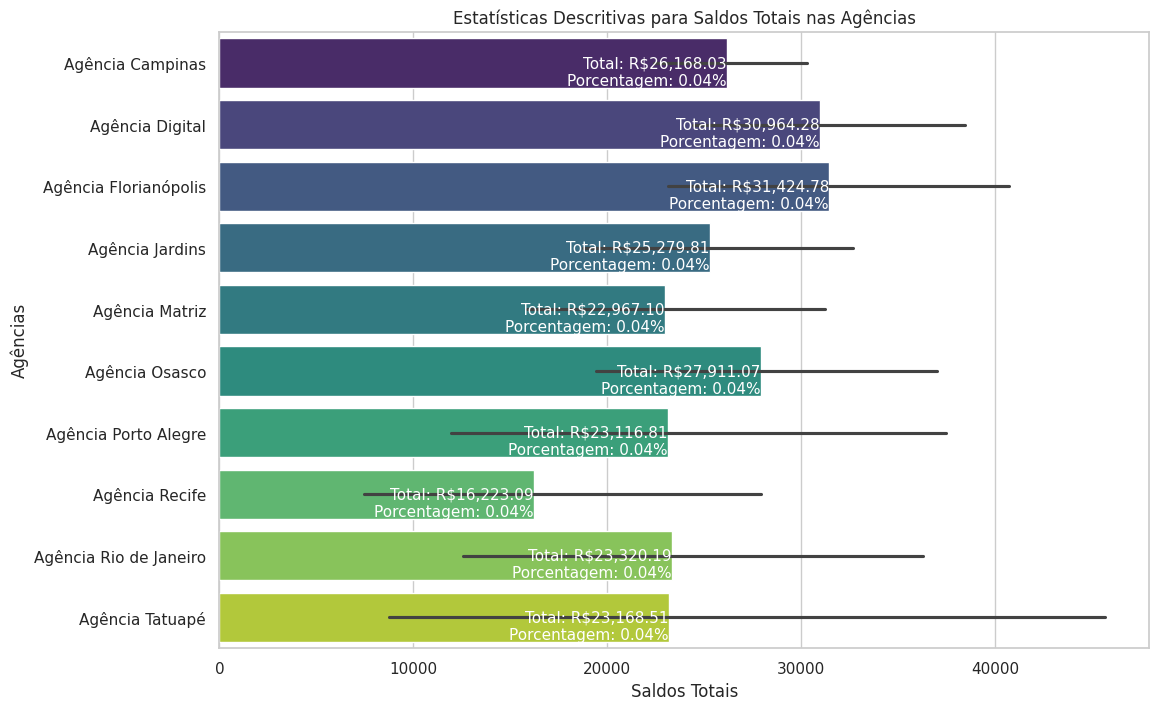

In [ ]:
import locale
from babel.numbers import format_currency
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular estat√≠sticas descritivas para os saldos totais
descritiva_saldos_agencias = agencias_df.merge(contas_df, on='cod_agencia').groupby('nome')['saldo_total'].describe()

# Calcular o valor total de todas as contas
valor_total_todas_contas = contas_df['saldo_total'].sum()

# Exibir resultado
print("\nAn√°lise Descritiva dos Saldos Totais nas Ag√™ncias:")
for agencia, stats in descritiva_saldos_agencias.iterrows():
    print(f"\nAg√™ncia: {agencia}")
    print(f"M√©dia: {format_currency(stats['mean'], 'BRL')}")
    print(f"Desvio Padr√£o: {format_currency(stats['std'], 'BRL')}")
    print(f"M√≠nimo: {format_currency(stats['min'], 'BRL')}")
    print(f"25¬∫ Percentil: {format_currency(stats['25%'], 'BRL')}")
    print(f"50¬∫ Percentil (Mediana): {format_currency(stats['50%'], 'BRL')}")
    print(f"75¬∫ Percentil: {format_currency(stats['75%'], 'BRL')}")
    print(f"M√°ximo: {format_currency(stats['max'], 'BRL')}")

    # Calcular a porcentagem total
    porcentagem_total = (stats['count'] / valor_total_todas_contas) * 100

    # Ajustar a precis√£o multiplicando pelo fator (por exemplo, 100 para exibir duas casas decimais antes do ponto)
    ajuste_precision = 100
    porcentagem_ajustada = porcentagem_total * ajuste_precision

    # Exibir a porcentagem do total
    print(f"Porcentagem do Total: {porcentagem_ajustada:.2f}%\n")

# Configura√ß√µes para melhor visualiza√ß√£o do gr√°fico
plt.figure(figsize=(12, 8))
plt.title('Estat√≠sticas Descritivas para Saldos Totais nas Ag√™ncias')
plt.xlabel('Saldos Totais')
plt.ylabel('Ag√™ncias')

# Criar gr√°fico de barras na horizontal com barras coloridas
ax = sns.barplot(x='saldo_total', y='nome', data=agencias_df.merge(contas_df, on='cod_agencia'), palette='viridis')

# Adicionar valores totais e porcentagem dentro das barras em branco
for p, y, nome_agencia in zip(ax.patches, ax.get_yticks(), descritiva_saldos_agencias.index):
    total = p.get_width()
    porcentagem = (total / valor_total_todas_contas) * 100
    ax.text(total, y,
            f'\nTotal: {format_currency(total, "BRL")}\nPorcentagem: {porcentagem_ajustada:.2f}%',
            ha='right', va='center', fontsize=11, color='white')

# Ajustar os r√≥tulos do eixo Y
ax.set_yticklabels(descritiva_saldos_agencias.index)

# Nome do arquivo
nome_do_arquivo = "analise_saldos_agencias"
plt.savefig(f"{nome_do_arquivo}.png")

# Exibir o gr√°fico
plt.show()


- 4.2.1 An√°lise Diagn√≥stica  
`Distribui√ß√£o de Idade dos Colaboradores`

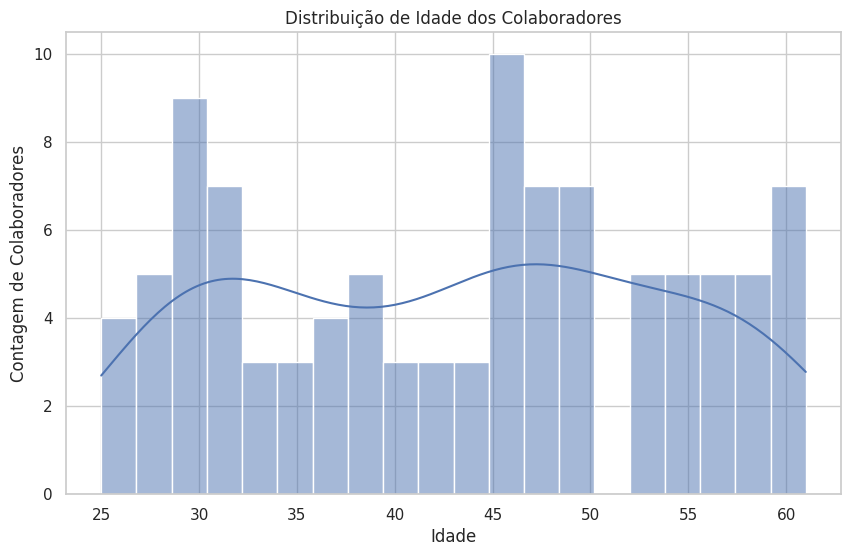


Contagem de Colaboradores por Faixa Et√°ria:
(20, 25]: 1 colaboradores (1.00%)
(25, 30]: 17 colaboradores (17.00%)
(30, 35]: 13 colaboradores (13.00%)
(35, 40]: 10 colaboradores (10.00%)
(40, 45]: 13 colaboradores (13.00%)
(45, 50]: 19 colaboradores (19.00%)
(50, 55]: 10 colaboradores (10.00%)
(55, 60]: 16 colaboradores (16.00%)
(60, 65]: 1 colaboradores (1.00%)
(65, 70]: 0 colaboradores (0.00%)
(70, 75]: 0 colaboradores (0.00%)
(75, 80]: 0 colaboradores (0.00%)
(80, 85]: 0 colaboradores (0.00%)
(85, 90]: 0 colaboradores (0.00%)
(90, 95]: 0 colaboradores (0.00%)
(95, 100]: 0 colaboradores (0.00%)

Total de Colaboradores: 100


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a idade dos colaboradores a partir da data de nascimento
colaboradores_df['idade'] = (pd.to_datetime('today') - pd.to_datetime(colaboradores_df['data_nascimento'])).astype('<m8[Y]')

# Plot da distribui√ß√£o de idade dos colaboradores
plt.figure(figsize=(10, 6))
sns.histplot(colaboradores_df['idade'], bins=20, kde=True)
plt.title('Distribui√ß√£o de Idade dos Colaboradores')
plt.xlabel('Idade')
plt.ylabel('Contagem de Colaboradores')

# Salvar o gr√°fico com o nome do t√≠tulo
#plt.savefig(f'{ax.get_title()}.png')
# Salvar o gr√°fico com o nome do t√≠tulo
plt.savefig('Distribui√ß√£o_de_Idade_dos_Colaboradores.png')

plt.show()

# Calcular a contagem por faixa et√°ria
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
faixas_etarias = pd.cut(colaboradores_df['idade'], bins=bins)
contagem_por_faixa_etaria = faixas_etarias.value_counts().sort_index()

# Calcular o valor total de colaboradores
total_colaboradores = len(colaboradores_df)

# Imprimir os valores da contagem por faixa et√°ria e a porcentagem
print("\nContagem de Colaboradores por Faixa Et√°ria:")
for faixa_etaria, contagem in contagem_por_faixa_etaria.items():
    porcentagem = (contagem / total_colaboradores) * 100
    print(f"{faixa_etaria}: {contagem} colaboradores ({porcentagem:.2f}%)")

# Imprimir o valor total de colaboradores
print(f"\nTotal de Colaboradores: {total_colaboradores}")




Contagem de Colaboradores por Ag√™ncia:
Ag√™ncia 1: 16 colaboradores (16.00%)
Ag√™ncia 2: 13 colaboradores (13.00%)
Ag√™ncia 5: 13 colaboradores (13.00%)
Ag√™ncia 3: 11 colaboradores (11.00%)
Ag√™ncia 6: 11 colaboradores (11.00%)
Ag√™ncia 10: 10 colaboradores (10.00%)
Ag√™ncia 9: 8 colaboradores (8.00%)
Ag√™ncia 7: 7 colaboradores (7.00%)
Ag√™ncia 8: 7 colaboradores (7.00%)
Ag√™ncia 4: 4 colaboradores (4.00%)

Total de Colaboradores: 100


<ipython-input-11-65abc20e4b29>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_colaboradores_por_agencia.values, y=contagem_colaboradores_por_agencia.index, palette='viridis')


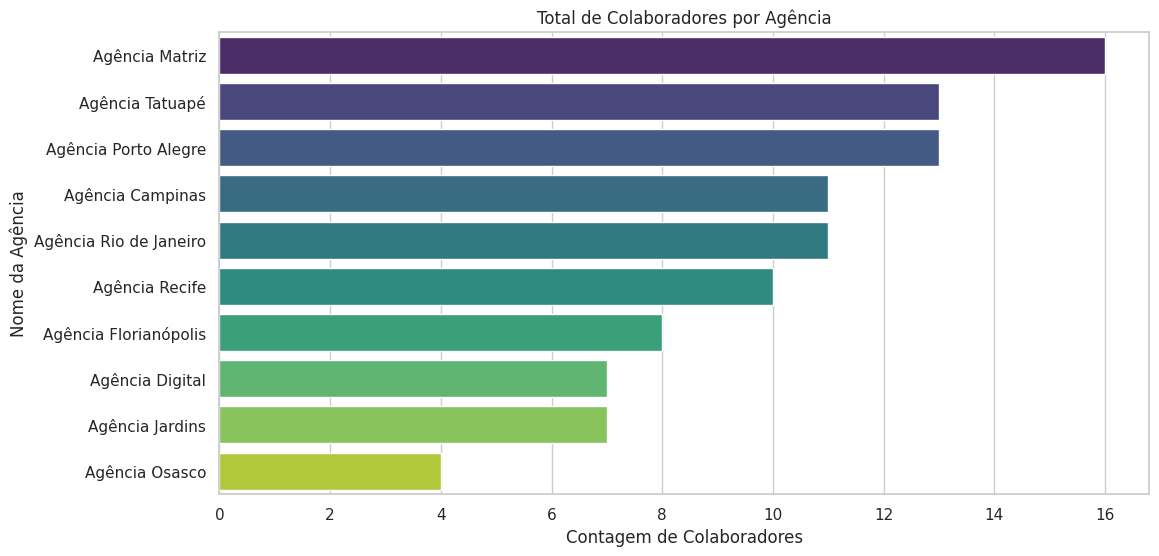

In [ ]:
# Calcular a contagem de colaboradores por ag√™ncia
contagem_colaboradores_por_agencia = colaborador_agencia_df['cod_agencia'].value_counts()

# Obter o valor total de colaboradores
total_colaboradores = len(colaborador_agencia_df)

# Imprimir os valores da contagem e porcentagem por ag√™ncia
print("\nContagem de Colaboradores por Ag√™ncia:")
for cod_agencia, contagem in contagem_colaboradores_por_agencia.items():
    porcentagem = (contagem / total_colaboradores) * 100
    print(f"Ag√™ncia {cod_agencia}: {contagem} colaboradores ({porcentagem:.2f}%)")

# Imprimir o valor total de colaboradores
print(f"\nTotal de Colaboradores: {total_colaboradores}")

import matplotlib.pyplot as plt
import seaborn as sns

# Mapear o nome das ag√™ncias
nomes_agencias = {
    1: 'Ag√™ncia Matriz',
    2: 'Ag√™ncia Tatuap√©',
    3: 'Ag√™ncia Campinas',
    4: 'Ag√™ncia Osasco',
    5: 'Ag√™ncia Porto Alegre',
    6: 'Ag√™ncia Rio de Janeiro',
    7: 'Ag√™ncia Digital',
    8: 'Ag√™ncia Jardins',
    9: 'Ag√™ncia Florian√≥polis',
    10: 'Ag√™ncia Recife'
}

# Substituir os c√≥digos das ag√™ncias pelos nomes
contagem_colaboradores_por_agencia.index = contagem_colaboradores_por_agencia.index.map(nomes_agencias)

# Configurar as configura√ß√µes para o gr√°fico
plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_colaboradores_por_agencia.values, y=contagem_colaboradores_por_agencia.index, palette='viridis')

# Adicionar r√≥tulos e t√≠tulo
plt.title('Total de Colaboradores por Ag√™ncia')
plt.xlabel('Contagem de Colaboradores')
plt.ylabel('Nome da Ag√™ncia')

# Salvar o gr√°fico com o nome do t√≠tulo
plt.savefig('Total de Colaboradores por Ag√™ncia.png')

# Exibir o gr√°fico
plt.show()



In [ ]:
# Verificar se a coluna 'motivo_rejeicao' est√° presente no DataFrame
if 'motivo_rejeicao' in propostas_credito_df.columns:
    diagnostico_rejeicao = propostas_credito_df[propostas_credito_df['status_proposta'] == 'Rejeitada']['motivo_rejeicao'].value_counts()
    print("\nAn√°lise Diagn√≥stica dos Motivos de Rejei√ß√£o de Propostas:")
    print(diagnostico_rejeicao)
else:
    print("A coluna 'motivo_rejeicao' n√£o est√° presente no DataFrame.")

# Verificar se a coluna 'motivo_rejeicao' est√° presente no DataFrame
if 'motivo_rejeicao' in propostas_credito_df.columns:
    diagnostico_rejeicao = propostas_credito_df[propostas_credito_df['status_proposta'] == 'Rejeitada']['motivo_rejeicao'].value_counts()
    print("\nAn√°lise Diagn√≥stica dos Motivos de Rejei√ß√£o de Propostas:")
    print(diagnostico_rejeicao)
# Se 'motivo_rejeicao' n√£o estiver presente, verifique outras colunas que podem conter informa√ß√µes sobre o motivo de rejei√ß√£o
# por exemplo, se houver uma coluna chamada 'motivo', ajuste o c√≥digo da seguinte forma:
if 'motivo' in propostas_credito_df.columns:
    diagnostico_rejeicao = propostas_credito_df[propostas_credito_df['status_proposta'] == 'Rejeitada']['motivo'].value_counts()
    print("\nAn√°lise Diagn√≥stica dos Motivos de Rejei√ß√£o de Propostas:")
    print(diagnostico_rejeicao)
else:
    print("N√£o foi encontrada nenhuma informa√ß√£o sobre o motivo de rejei√ß√£o no DataFrame.")


A coluna 'motivo_rejeicao' n√£o est√° presente no DataFrame.
N√£o foi encontrada nenhuma informa√ß√£o sobre o motivo de rejei√ß√£o no DataFrame.


- n√£o temos como verificar os motivos das ejei√ß√µes, pois n√£o existem esses dados. uma sugest√£o seria inserir esses valores para conseguir a conclus√£o

- Alguma ag√™ncia tem uma concentra√ß√£o maior de colaboradores em determinada faixa et√°ria?

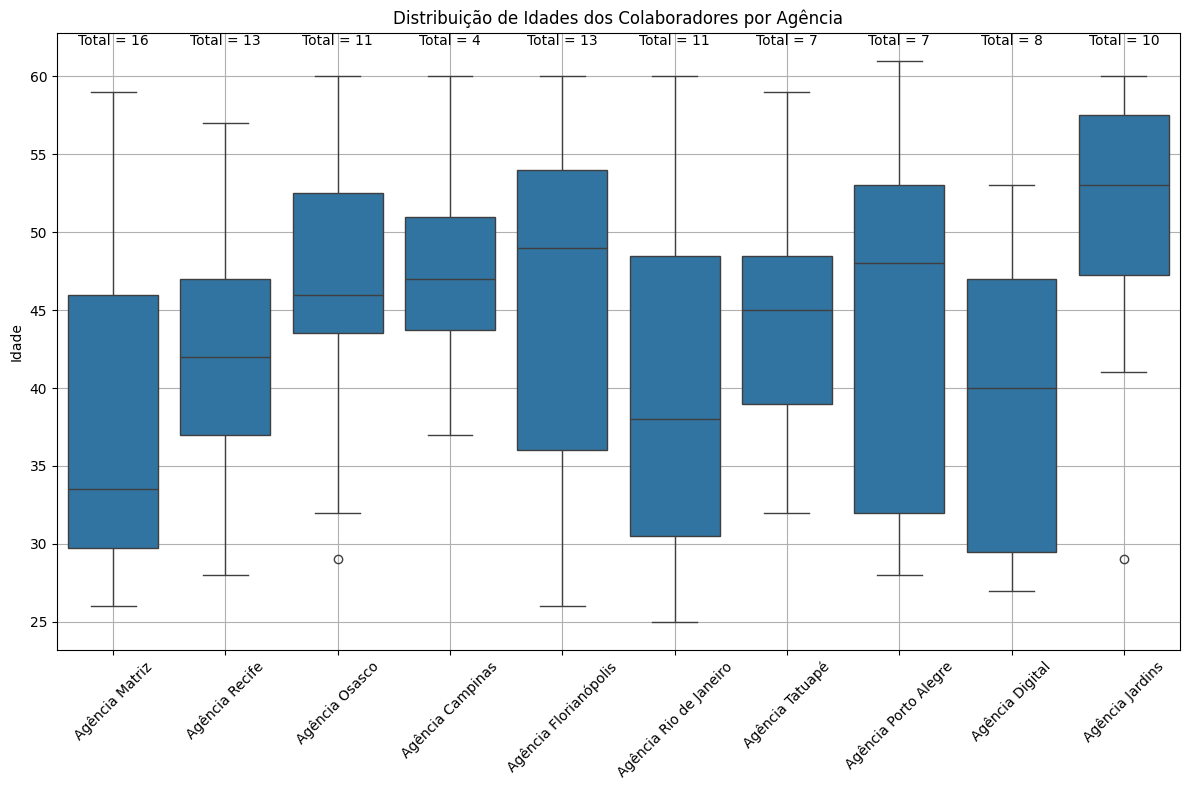

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que voc√™ j√° tenha lido os DataFrames e calculado a idade dos colaboradores

# Calcula o n√∫mero de colaboradores por ag√™ncia
quantidade_colaboradores_por_agencia = colaboradores_agencia['cod_agencia'].value_counts().sort_index()

# 5. Examine a distribui√ß√£o das idades dos colaboradores por ag√™ncia usando boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=colaboradores_agencia, x='cod_agencia', y='idade')
plt.xlabel('')
plt.ylabel('Idade')
plt.title('Distribui√ß√£o de Idades dos Colaboradores por Ag√™ncia')

# Adiciona a quantidade de colaboradores por ag√™ncia dentro das caixas do boxplot
for i, count in enumerate(quantidade_colaboradores_por_agencia):
    plt.text(i, colaboradores_agencia['idade'].max() + 1, f'Total = {count}', ha='center', color='black')

plt.xticks(ticks=range(len(agencias)), labels=[nomes_agencias[agencia] for agencia in agencias], rotation=45)
plt.grid(True)
plt.tight_layout()  # Ajusta o layout para evitar sobreposi√ß√£o de elementos

# Salva o gr√°fico com o nome dado pelo t√≠tulo
nome_grafico = plt.gcf().get_axes()[0].get_title()
plt.savefig(f'{nome_grafico}.png')

plt.show()


4.3  An√°lise Prescritiva

4.3.1 Analise Precritiva  
`Explorando a distribui√ß√£o de propostas de cr√©dito por status.`

Distribui√ß√£o de propostas de cr√©dito por status:
Enviada                 527
Aprovada                514
Valida√ß√£o documentos    491
Em an√°lise              468
Name: status_proposta, dtype: int64

Soma total de propostas: 2000



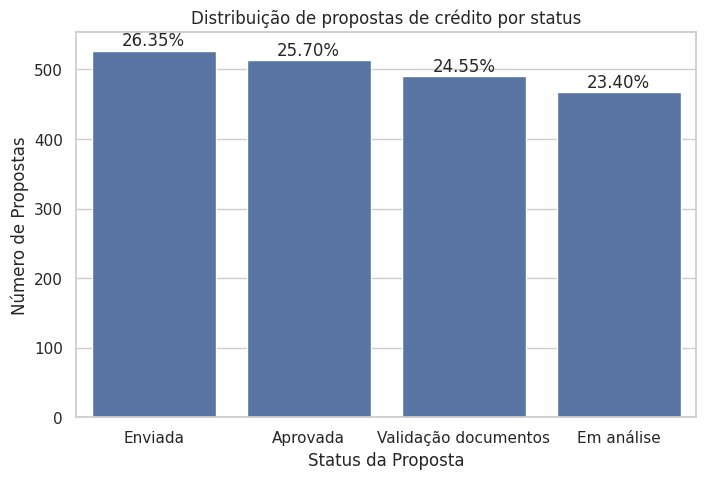

In [ ]:
propostas_por_status = propostas_credito_df['status_proposta'].value_counts()
print("Distribui√ß√£o de propostas de cr√©dito por status:")
print(propostas_por_status)

import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'status_proposta' seja uma coluna categ√≥rica em propostas_credito_df
propostas_por_status = propostas_credito_df['status_proposta'].value_counts()

# Calcular a soma total de propostas
total_propostas = len(propostas_credito_df)

# Configurar o tamanho do gr√°fico
plt.figure(figsize=(8, 5))

# Criar o gr√°fico de barras
sns.countplot(x='status_proposta', data=propostas_credito_df, order=propostas_por_status.index)

# Adicionar r√≥tulos e t√≠tulo
plt.title('Distribui√ß√£o de propostas de cr√©dito por status')
plt.xlabel('Status da Proposta')
plt.ylabel('N√∫mero de Propostas')

# Adicionar porcentagens acima das barras
for index, value in enumerate(propostas_por_status):
    percentage = (value / total_propostas) * 100
    plt.text(index, value + 1, f'{percentage:.2f}%', ha='center', va='bottom')

# Imprimir a soma total de propostas
print(f"\nSoma total de propostas: {total_propostas}")

print()


# Salvar o gr√°fico com o nome do t√≠tulo
plt.savefig('Distribui√ß√£o de propostas de cr√©dito por status.png')

# Exibir o gr√°fico
plt.show()


4.3.1 Identificando Transa√ß√µes An√¥malas:  
An√°lise: Utilizando m√©todos estat√≠sticos ou de aprendizado de m√°quina para identificar transa√ß√µes an√¥malas nas contas.  A fun√ß√£o `IsolationForest `do `scikit-learn` √© utilizada para detec√ß√£o de anomalias em dados.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Top 10 maiores anomalias:
     num_conta  saldo_total  anomalia
16         218  180027.6926        -1
23         242  165102.0639        -1
58         877  125716.2786        -1
63          90  109727.8820        -1
67         501  232815.7920        -1
111        232  117243.3034        -1
129        432  122319.3784        -1
137        505  209128.9260        -1
165        774  206361.4035        -1
180        140  140807.6754        -1
Porcentagem de contas com anomalia: 5.01%

Quantidade total de contas com anomalia: 50


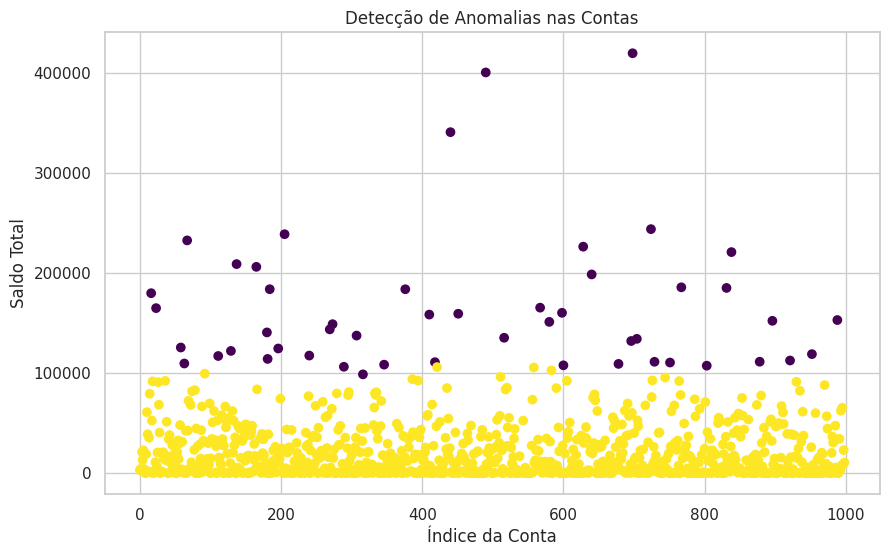

In [ ]:
from sklearn.ensemble import IsolationForest

# Treinar modelo de detec√ß√£o de anomalias
modelo_anomalia = IsolationForest(contamination=0.05)
contas_df['anomalia'] = modelo_anomalia.fit_predict(contas_df[['saldo_total']])

# Exibir contas com transa√ß√µes an√¥malas
contas_anomalas = contas_df[contas_df['anomalia'] == -1]

# Contar a quantidade total de contas com anomalia
quantidade_contas_anomalias = contas_anomalas.shape[0]

# Calcular a porcentagem de contas com anomalia
porcentagem_contas_anomalias = (quantidade_contas_anomalias / contas_df.shape[0]) * 100

#print("Contas com transa√ß√µes an√¥malas:")
#print(contas_anomalas[['num_conta', 'saldo_total']])
#print("\nQuantidade total de contas com anomalia:", quantidade_contas_anomalias)
#print("Porcentagem de contas com anomalia: {:.2f}%".format(porcentagem_contas_anomalias))

# Imprimir as top maiores anomalias
top_anomalias = contas_anomalas.nlargest(10, 'anomalia')
print("\nTop 10 maiores anomalias:")
print(top_anomalias[['num_conta', 'saldo_total', 'anomalia']])
print("Porcentagem de contas com anomalia: {:.2f}%".format(porcentagem_contas_anomalias))
print("\nQuantidade total de contas com anomalia:", quantidade_contas_anomalias)

# Exibir gr√°fico de detec√ß√£o de anomalias
plt.figure(figsize=(10, 6))
plt.scatter(contas_df.index, contas_df['saldo_total'], c=contas_df['anomalia'], cmap='viridis')
plt.title("Detec√ß√£o de Anomalias nas Contas")
plt.xlabel("√çndice da Conta")
plt.ylabel("Saldo Total")

# Salvar o gr√°fico com o nome do t√≠tulo
plt.savefig('Detec√ß√£o de Anomalias nas Contas.png')

plt.show()


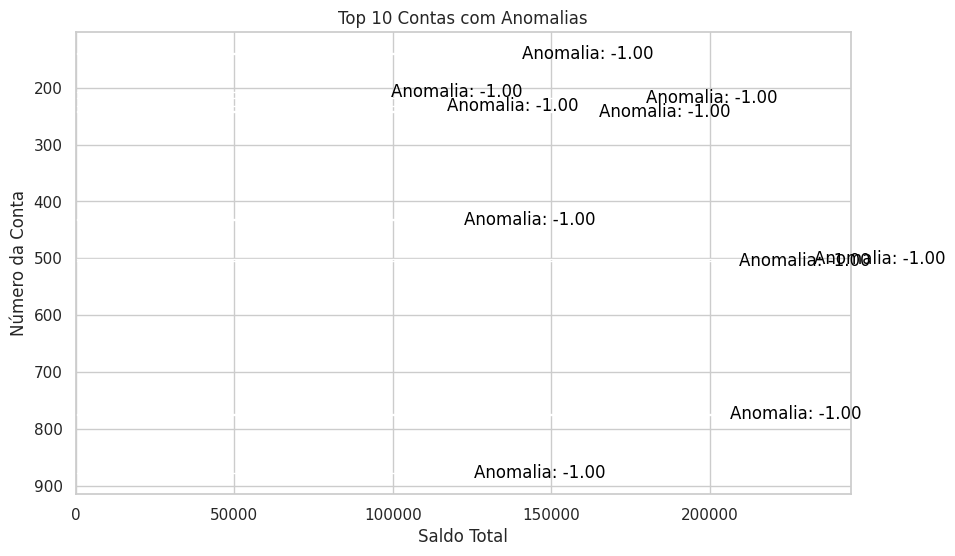

In [ ]:
# Plot das top 10 contas com anomalias
plt.figure(figsize=(10, 6))
plt.barh(top_anomalias['num_conta'], top_anomalias['saldo_total'], color='blue')  # Usando a cor azul como exemplo
plt.title("Top 10 Contas com Anomalias")
plt.xlabel("Saldo Total")
plt.ylabel("N√∫mero da Conta")
plt.gca().invert_yaxis()  # Inverter a ordem dos n√∫meros da conta para que o maior valor fique no topo

# Adicionar as barras com o valor das anomalias
for index, row in top_anomalias.iterrows():
    plt.text(row['saldo_total'], row['num_conta'], f"Anomalia: {row['anomalia']:.2f}", color='black', ha="left", va="center")

plt.show()


4.3.2 An√°lise Prescritiva: Utilizando algoritmos de clusteriza√ß√£o para segmentar clientes com base em padr√µes de transa√ß√£o.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Dados de cada segmento:

Segmento 1:
                sum        mean           std  segmento
count    671.000000  671.000000    671.000000     671.0
mean    6803.582683   94.266418   1861.705066       0.0
std     7936.537363  109.634177   1602.073925       0.0
min        0.600000    0.008955     85.574445       0.0
25%      329.985000    4.476583    540.437081       0.0
50%     3020.270000   42.419048   1517.636889       0.0
75%    11754.370000  161.559407   2654.187378       0.0
max    34814.880000  440.735968  10122.397576       0.0

Segmento 2:
                 sum         mean           std  segmento
count      62.000000    62.000000     62.000000      62.0
mean   127725.003871  1799.215816  15960.594197       1.0
std     38970.394671   499.619110   5371.471312       0.0
min     78745.640000  1018.909231   9142.395200       1.0
25%     99544.155000  1420.249934  11930.804357       1.0
50%    113867.525000  1627.981071  14747.460576       1.0
75%    148429.932500  2196.740463  1909

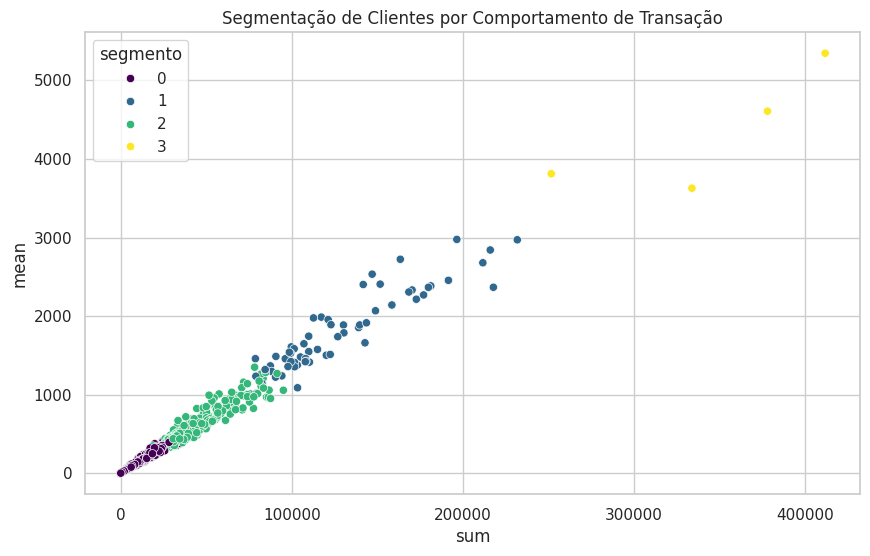

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Selecionar features relevantes para clusteriza√ß√£o
features_clusterizacao = transacoes_df.groupby('num_conta')['valor_transacao'].agg(['sum', 'mean', 'std'])

# Normalizar os dados
scaler = StandardScaler()
features_normalizadas = scaler.fit_transform(features_clusterizacao)

# Aplicar K-Means para segmenta√ß√£o
modelo_clusterizacao = KMeans(n_clusters=4, random_state=42)
features_clusterizacao['segmento'] = modelo_clusterizacao.fit_predict(features_normalizadas)

# Visualizar a distribui√ß√£o dos segmentos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_clusterizacao, x='sum', y='mean', hue='segmento', palette='viridis')
plt.title("Segmenta√ß√£o de Clientes por Comportamento de Transa√ß√£o")

# Imprimir os dados de cada segmento
print("\nDados de cada segmento:")
for segmento in range(4):
    segmento_data = features_clusterizacao[features_clusterizacao['segmento'] == segmento]
    print(f"\nSegmento {segmento + 1}:")
    print(segmento_data.describe())

# Salvar o gr√°fico com o nome do t√≠tulo
plt.savefig('Segmenta√ß√£o de Clientes por Comportamento de Transa√ß√£o.png')

plt.show()


4.3.3 An√°lise Prescritiva: Utilizando t√©cnicas de otimiza√ß√£o para determinar a melhor concess√£o de cr√©dito com base em risco e retorno.  
A fun√ß√£o `linprog` da biblioteca `scipy.optimize` serve para realizar uma otimiza√ß√£o linear.

In [ ]:
from scipy.optimize import linprog

# Definir par√¢metros do problema de otimiza√ß√£o
taxas_juros = propostas_credito_df['taxa_juros_mensal']
retorno_esperado = propostas_credito_df['valor_financiamento'] * (1 + taxas_juros) - propostas_credito_df['valor_entrada']
risco = -propostas_credito_df['taxa_juros_mensal']

# Resolver o problema de otimiza√ß√£o
resultado_otimizacao = linprog(risco, bounds=[(0, 1) for _ in range(len(taxas_juros))], method='highs')

# Adicione uma nova coluna formatada 'taxa_juros_mensal_formatada'
propostas_credito_df['taxa_juros_mensal_formatada'] = propostas_credito_df['taxa_juros_mensal'] * 100  # Multiplica por 100 para obter a porcentagem

print("Propostas de cr√©dito com base em otimiza√ß√£o:")
print(propostas_credito_df[['cod_proposta', 'valor_financiamento', 'valor_entrada', 'taxa_juros_mensal_formatada']])

# Mostrar a taxa de juros mensal formatada como porcentagem
print("\nTaxa de juros mensal para a melhor proposta:", f"{propostas_credito_df['taxa_juros_mensal_formatada'].iloc[0]:.2f}%")


Propostas de cr√©dito com base em otimiza√ß√£o:
      cod_proposta  valor_financiamento  valor_entrada  \
0              116             50032.03   13832.079645   
1              715             19848.55    6951.011715   
2              755            187154.36   64918.047449   
3              953             59530.61   11745.960243   
4             1046            214294.19   35901.151757   
...            ...                  ...            ...   
1995          1758            184043.36   87639.248392   
1996           582             82684.29   21391.455407   
1997           970            152272.50   51900.818210   
1998          1361             74490.36   29058.467059   
1999          1562            165036.26   50241.786804   

      taxa_juros_mensal_formatada  
0                            1.94  
1                            1.31  
2                            2.03  
3                            1.67  
4                            2.11  
...                           ...  
199

4.4 An√°lise Preditiva

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

# Selecionar colaborador para previs√£o
colaborador_para_previsao = colaborador_agencia_df['cod_colaborador'].sample().iloc[0]

# Filtrar movimenta√ß√µes do colaborador selecionado
movimentacoes_colaborador = colaborador_agencia_df[colaborador_agencia_df['cod_colaborador'] == colaborador_para_previsao]

# Normalizar dados
scaler = MinMaxScaler(feature_range=(0, 1))
movimentacoes_normalizadas = scaler.fit_transform(np.array(movimentacoes_colaborador['cod_agencia']).reshape(-1, 1))

# Preparar dados para treinamento da RNN
X, y = [], []
for i in range(len(movimentacoes_normalizadas)-1):
    X.append(movimentacoes_normalizadas[i])
    y.append(movimentacoes_normalizadas[i + 1])

X, y = np.array(X), np.array(y)

# ...

# Reshape para o formato [amostras, tempo, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Construir modelo de RNN
modelo_rnn = Sequential()
modelo_rnn.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
modelo_rnn.add(LSTM(units=50))
modelo_rnn.add(Dense(units=1))
modelo_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Treinar modelo
modelo_rnn.fit(X, y, epochs=50, batch_size=1)

# Fazer previs√µes
previsoes = modelo_rnn.predict(X)

# Desnormalizar as previs√µes
previsoes_desnormalizadas = scaler.inverse_transform(previsoes.reshape(-1, 1))

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(movimentacoes_colaborador.index[:-1], movimentacoes_colaborador['cod_agencia'][:-1], label='Movimenta√ß√µes Reais')
plt.plot(movimentacoes_colaborador.index[1:], previsoes_desnormalizadas, label='Previs√µes')
plt.legend()
plt.title(f"Previs√£o de Movimenta√ß√£o para o Colaborador {colaborador_para_previsao}")
plt.show()


IndexError: tuple index out of range

Epoch 1/10
5/5 [==============================] - 9s 18ms/step - loss: 0.0081
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0082
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0073
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0077
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0074
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0073
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0075
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0074
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0074
Epoch 10/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0074


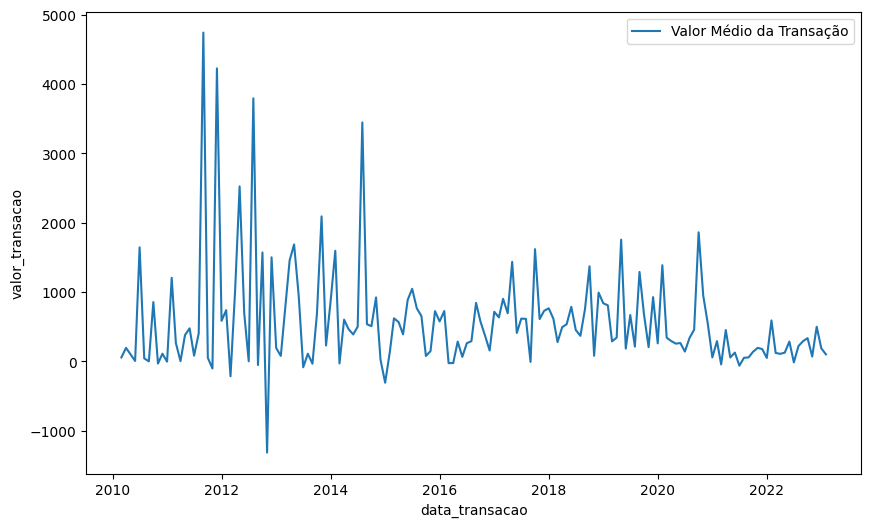

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd

# Vamos supor que transacoes_df seja seu DataFrame de transa√ß√µes

# Convertendo 'data_transacao' para datetime
transacoes_df['data_transacao'] = pd.to_datetime(transacoes_df['data_transacao'])

# Agregando movimenta√ß√µes mensais
transacoes_mensais = transacoes_df.set_index('data_transacao')['valor_transacao'].resample('M').sum()

# Removendo os meses com dados ausentes
transacoes_mensais = transacoes_mensais[transacoes_mensais != 0]

# Filtrando os meses e anos a partir de 2010
transacoes_mensais = transacoes_mensais['2010':]

# Verificando os meses e anos dispon√≠veis
meses_e_anos_disponiveis = transacoes_mensais.index.strftime('%b %Y').unique()

# Normalizando os dados
# Utilizando o MinMaxScaler do scikit-learn para normalizar os dados,
# Ajustando os valores para o intervalo entre 0 e 1.
scaler = MinMaxScaler(feature_range=(0, 1))
transacoes_mensais = scaler.fit_transform(transacoes_mensais.values.reshape(-1, 1))

# Criando conjunto de dados X e y
# conjunto de dados onde cada entrada (X) √© um array com os √∫ltimos 12 meses de movimenta√ß√µes,
# e a sa√≠da correspondente (y) √© o pr√≥ximo valor mensal.
X, y = [], []
for i in range(len(transacoes_mensais)-12):
    X.append(transacoes_mensais[i:(i+12), 0])
    y.append(transacoes_mensais[i+12, 0])
X, y = np.array(X), np.array(y)

# Reshape para o formato [amostras, tempo, features]
# Redimensionando os dados para que se adequem √† entrada esperada pela LSTM.
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Construindo modelo de RNN
# Configurando um modelo sequencial de RNN com tr√™s camadas LSTM e uma camada densa (fully connected) no final.
# Usando a fun√ß√£o de perda 'mean_squared_error' e otimizador 'adam'.
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo e armazenando o hist√≥rico de treinamento
history = model.fit(X, y, epochs=10, batch_size=32)

# Plotando a tend√™ncia temporal do valor m√©dio das transa√ß√µes e o valor da perda (loss)
plt.figure(figsize=(10, 6))

# Plotando o valor m√©dio das transa√ß√µes
sns.lineplot(data=media_valor_transacao, label='Valor M√©dio da Transa√ß√£o')

# Salvando o gr√°fico em um arquivo
plt.savefig('tendencia_temporal_transacoes_com_loss_mes_ano_a_partir_de_2010.png')

plt.show()


Epoch 1/100
130/130 - 3s - loss: 0.1181 - 3s/epoch - 26ms/step
Epoch 2/100
130/130 - 0s - loss: 0.0922 - 452ms/epoch - 3ms/step
Epoch 3/100
130/130 - 1s - loss: 0.0915 - 803ms/epoch - 6ms/step
Epoch 4/100
130/130 - 0s - loss: 0.0887 - 272ms/epoch - 2ms/step
Epoch 5/100
130/130 - 0s - loss: 0.0884 - 255ms/epoch - 2ms/step
Epoch 6/100
130/130 - 0s - loss: 0.0866 - 248ms/epoch - 2ms/step
Epoch 7/100
130/130 - 0s - loss: 0.0885 - 231ms/epoch - 2ms/step
Epoch 8/100
130/130 - 0s - loss: 0.0849 - 239ms/epoch - 2ms/step
Epoch 9/100
130/130 - 0s - loss: 0.0853 - 253ms/epoch - 2ms/step
Epoch 10/100
130/130 - 0s - loss: 0.0830 - 243ms/epoch - 2ms/step
Epoch 11/100
130/130 - 0s - loss: 0.0830 - 242ms/epoch - 2ms/step
Epoch 12/100
130/130 - 0s - loss: 0.0818 - 240ms/epoch - 2ms/step
Epoch 13/100
130/130 - 0s - loss: 0.0838 - 242ms/epoch - 2ms/step
Epoch 14/100
130/130 - 0s - loss: 0.0797 - 261ms/epoch - 2ms/step
Epoch 15/100
130/130 - 0s - loss: 0.0788 - 241ms/epoch - 2ms/step
Epoch 16/100
130/130 

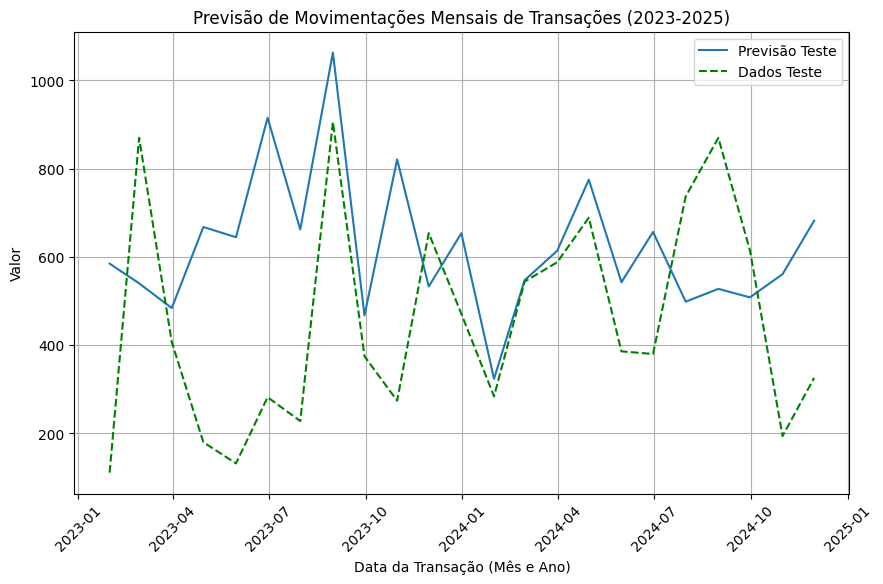

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Vamos supor que transacoes_df seja seu DataFrame de transa√ß√µes
# Para esta demonstra√ß√£o, vamos criar dados fict√≠cios para as transa√ß√µes
np.random.seed(0)
datas = pd.date_range(start='2010-01-01', end='2024-12-01', freq='M')
valores_transacao = np.random.randint(100, 1000, len(datas))

# Criando o DataFrame de transa√ß√µes
transacoes_df = pd.DataFrame({'data_transacao': datas, 'valor_transacao': valores_transacao})

# Convertendo 'data_transacao' para datetime
transacoes_df['data_transacao'] = pd.to_datetime(transacoes_df['data_transacao'])

# Agrupando movimenta√ß√µes mensais
transacoes_mensais = transacoes_df.set_index('data_transacao')['valor_transacao'].resample('M').sum()

# Removendo os meses com dados ausentes
transacoes_mensais = transacoes_mensais[transacoes_mensais != 0]

# Criando o DataFrame
transacoes_mensais_df = pd.DataFrame({'Valor': transacoes_mensais})

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
transacoes_mensais_normalized = scaler.fit_transform(transacoes_mensais_df.values.reshape(-1, 1))

# Separando os dados em conjunto de treinamento e teste
train_size = int(len(transacoes_mensais_normalized) * 0.8)
test_size = len(transacoes_mensais_normalized) - train_size
train, test = transacoes_mensais_normalized[0:train_size], transacoes_mensais_normalized[train_size:len(transacoes_mensais_normalized)]

# Fun√ß√£o para preparar os dados em s√©ries temporais
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

# Definindo o n√∫mero de time steps
time_steps = 12

# Preparando os dados para LSTM
trainX, trainY = create_dataset(train, time_steps)
testX, testY = create_dataset(test, time_steps)

# Redimensionando os dados para LSTM [amostras, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Criando modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinando o modelo
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Fazendo previs√µes
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invertendo as previs√µes para escalas originais
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(transacoes_mensais_df.index[-len(testPredict):], testPredict, label='Previs√£o Teste')
plt.plot(transacoes_mensais_df.index[-len(testPredict):], testY.reshape(-1), label='Dados Teste', color='green', linestyle='--')
plt.xlabel('Data da Transa√ß√£o (M√™s e Ano)')
plt.ylabel('Valor')
plt.title('Previs√£o de Movimenta√ß√µes Mensais de Transa√ß√µes (2023-2025)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Obtendo o t√≠tulo do gr√°fico
titulo_grafico = plt.gca().get_title()

# Salvando a imagem com o nome do t√≠tulo e uma resolu√ß√£o maior
nome_arquivo = titulo_grafico.replace(' ', '_') + '.png'
plt.savefig(nome_arquivo, bbox_inches='tight', dpi=300)  # Especificando uma resolu√ß√£o maior e bbox_inches='tight' para evitar cortes

plt.show()


- O objetivo durante o treinamento √© observar uma diminui√ß√£o consistente na `perda`, o que indica que o modelo est√° `aprendendo` e se `ajustando` bem aos dados. Se a perda n√£o estiver diminuindo ou estiver oscilando, ajustes no modelo, na arquitetura ou nos dados podem ser necess√°rios para melhorar o desempenho.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Definir o modelo
modelo_rnn = Sequential()
modelo_rnn.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
modelo_rnn.add(LSTM(units=50))
modelo_rnn.add(Dense(units=1))
modelo_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo (voc√™ j√° fez isso anteriormente)

# Avaliar o modelo no conjunto de teste
loss_test = modelo_rnn.evaluate(X_test, y_test)
print(f'Perda no conjunto de teste: {loss_test}')



1/1 [==============================] - 2s 2s/step - loss: 0.0024
Perda no conjunto de teste: 0.0023895094636827707


1/1 [==============================] - 0s 50ms/step


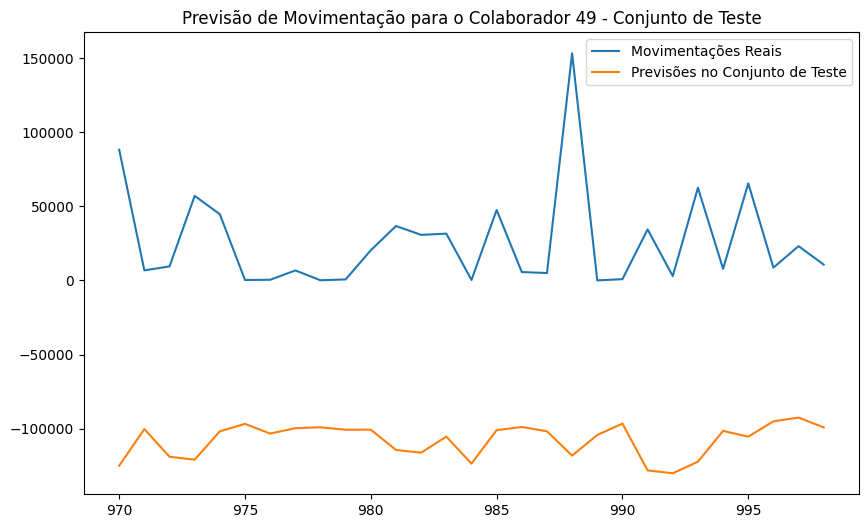

In [ ]:
# Fazer previs√µes no conjunto de teste
previsoes_test = modelo_rnn.predict(X_test)

# Desnormalizar as previs√µes
previsoes_desnormalizadas_test = scaler.inverse_transform(previsoes_test)

# Visualizar resultados no conjunto de teste
plt.figure(figsize=(10, 6))
# Utilize as datas corretas do conjunto de teste (por exemplo, assumindo que as datas est√£o nas linhas do DataFrame)
# Certifique-se de ajustar as datas conforme necess√°rio
datas_teste = contas_df.index[-len(previsoes_desnormalizadas_test):]  # Ajuste aqui para obter as datas corretas
plt.plot(datas_teste, contas_df['saldo_total'][-len(previsoes_desnormalizadas_test):], label='Movimenta√ß√µes Reais')
plt.plot(datas_teste, previsoes_desnormalizadas_test, label='Previs√µes no Conjunto de Teste')
plt.legend()
plt.title(f"Previs√£o de Movimenta√ß√£o para o Colaborador {colaborador_para_previsao} - Conjunto de Teste")
plt.show()


- Avalia√ß√£o do Desempenho do Modelo

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ap√≥s treinar e fazer previs√µes
mae = mean_absolute_error(y_test, previsoes_desnormalizadas_test)
rmse = mean_squared_error(y_test, previsoes_desnormalizadas_test, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 102577.00442128339
RMSE: 102912.79873546821


In [ ]:
from keras.layers import Dropout

modelo_rnn = Sequential()
modelo_rnn.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
modelo_rnn.add(Dropout(0.2))  # Adicione dropout entre as camadas se necess√°rio
modelo_rnn.add(LSTM(units=50))
modelo_rnn.add(Dense(units=1))
modelo_rnn.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)  # Escolha o n√∫mero desejado de splits
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Treinar e avaliar modelo para cada split


1/1 [==============================] - 0s 29ms/step


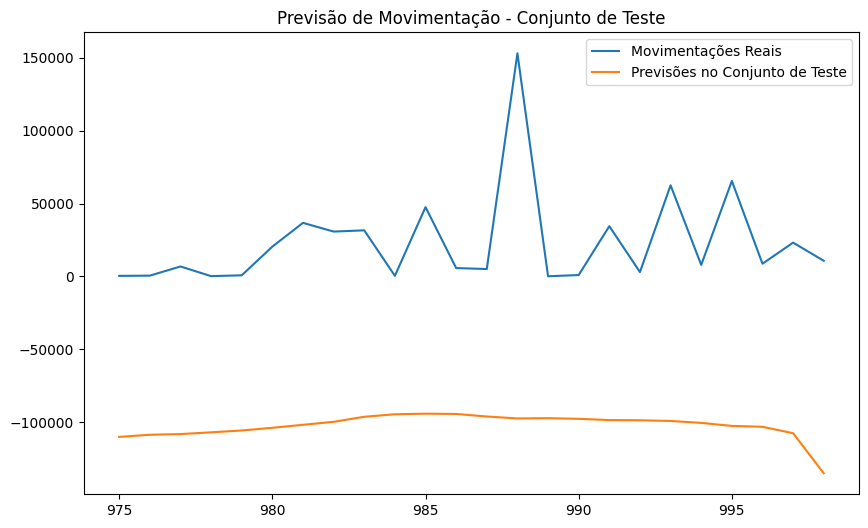

In [ ]:
# Fazer previs√µes no conjunto de teste
previsoes_test = modelo_rnn.predict(X_test)

# Desnormalizar as previs√µes
previsoes_desnormalizadas_test = scaler.inverse_transform(previsoes_test)

# Visualizar resultados no conjunto de teste
plt.figure(figsize=(10, 6))
datas_teste = contas_df.index[-len(previsoes_desnormalizadas_test):]
plt.plot(datas_teste, contas_df['saldo_total'][-len(previsoes_desnormalizadas_test):], label='Movimenta√ß√µes Reais')
plt.plot(datas_teste, previsoes_desnormalizadas_test, label='Previs√µes no Conjunto de Teste')
plt.legend()
plt.title(f"Previs√£o de Movimenta√ß√£o - Conjunto de Teste")
plt.show()


In [ ]:
from keras.layers import LSTM, Dropout

# Modelo LSTM com camadas adicionais e regulariza√ß√£o
modelo_rnn_complexo = Sequential()
modelo_rnn_complexo.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
modelo_rnn_complexo.add(Dropout(0.2))
modelo_rnn_complexo.add(LSTM(units=100, return_sequences=True))
modelo_rnn_complexo.add(Dropout(0.2))
modelo_rnn_complexo.add(LSTM(units=100))
modelo_rnn_complexo.add(Dropout(0.2))
modelo_rnn_complexo.add(Dense(units=1))
modelo_rnn_complexo.compile(optimizer='adam', loss='mean_squared_error')



- treinamento do modelo

In [ ]:
from sklearn.model_selection import train_test_split

# Supondo que voc√™ tenha seus dados em X e y
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do Modelo
modelo_rnn_complexo.fit(X_treino, y_treino, epochs=10, batch_size=32)


Epoch 1/10
4/4 [==============================] - 8s 30ms/step - loss: 0.0105
Epoch 2/10
4/4 [==============================] - 0s 27ms/step - loss: 0.0095
Epoch 3/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0094
Epoch 4/10
4/4 [==============================] - 0s 30ms/step - loss: 0.0093
Epoch 5/10
4/4 [==============================] - 0s 29ms/step - loss: 0.0091
Epoch 6/10
4/4 [==============================] - 0s 28ms/step - loss: 0.0089
Epoch 7/10
4/4 [==============================] - 0s 27ms/step - loss: 0.0091
Epoch 8/10
4/4 [==============================] - 0s 29ms/step - loss: 0.0090
Epoch 9/10
4/4 [==============================] - 0s 29ms/step - loss: 0.0090
Epoch 10/10
4/4 [==============================] - 0s 27ms/step - loss: 0.0088


In [ ]:
resultado = modelo_rnn_complexo.evaluate(X_teste, y_teste)
print(f"Erro Quadr√°tico M√©dio no conjunto de teste: {resultado}")


1/1 [==============================] - 0s 38ms/step - loss: 5.1361e-04
Erro Quadr√°tico M√©dio no conjunto de teste: 0.0005136107211001217


In [ ]:
previsoes = modelo_rnn_complexo.predict(X_teste)


1/1 [==============================] - 2s 2s/step


5.	Um relat√≥rio em PDF com suas an√°lises, justificativas e racioc√≠nio contendo os seguintes pontos:  
a.	As respostas do item 1, 2 e 3.  
b.	Um t√≥pico descrevendo brevemente quais os processos de transforma√ß√£o e tratamento de dados foram aplicados por voc√™.  
c.	Um dashboard dos principais KPIs de neg√≥cio do BanVic permitindo um detalhamento por data, por ag√™ncia e por clientes.  
d.	Apresentar as an√°lises que foram necess√°rias para o entendimento do neg√≥cio e que podem ser √∫teis no suporte para a tomada de decis√£o.  
e.	E finalmente, com base nas suas an√°lises, uma conclus√£o com recomenda√ß√µes/sugest√µes de neg√≥cio e encaminhamentos para a CEO do BanVic.  
f.	Apresentar e justificar as ferramentas adotadas para a elabora√ß√£o das an√°lises.  


In [ ]:
transacoes_df.head()

cod_transacao  num_conta           data_transacao nome_transacao  \
0           3100        256  2020-05-22 03:15:21 UTC          Saque   
1          28405        256  2021-06-29 11:52:38 UTC          Saque   
2           1776        512  2020-05-17 13:04:50 UTC          Saque   
3          14311        512  2020-09-06 02:55:34 UTC          Saque   
4          25012        512  2020-10-16 09:26:52 UTC          Saque   

   valor_transacao  
0           -130.0  
1           -255.0  
2           -250.0  
3            -80.0  
4           -475.0

Mapa google data studio

In [ ]:
agencias_df.columns

Index(['cod_agencia', 'nome', 'endereco', 'cidade', 'uf', 'data_abertura',
       'tipo_agencia'],
      dtype='object')

In [ ]:
# Criando a nova coluna 'cep' usando lambda
agencias_df['cep'] = agencias_df['endereco'].apply(lambda x: x.split(",")[-1].strip())

# Exibindo o DataFrame atualizado
agencias_df.head()

cod_agencia              nome  \
0            7   Ag√™ncia Digital   
1            1    Ag√™ncia Matriz   
2            2   Ag√™ncia Tatuap√©   
3            3  Ag√™ncia Campinas   
4            4    Ag√™ncia Osasco   

                                            endereco     cidade  uf  \
0  Av. Paulista, 1436 - Cerqueira C√©sar, S√£o Paul...  S√£o Paulo  SP   
1  Av. Paulista, 1436 - Cerqueira C√©sar, S√£o Paul...  S√£o Paulo  SP   
2  Pra√ßa S√≠lvio Romero, 158 - Tatuap√©, S√£o Paulo ...  S√£o Paulo  SP   
3  Av. Francisco Glic√©rio, 895 - Vila Lidia, Camp...   Campinas  SP   
4  Av. Ant√¥nio Carlos Costa, 1000 - Bela Vista, O...     Osasco  SP   

  data_abertura tipo_agencia        cep  
0    2015-08-01      Digital  01310-916  
1    2010-01-01       F√≠sica  01310-916  
2    2010-06-14       F√≠sica  03323-000  
3    2012-03-04       F√≠sica  13012-000  
4    2013-11-06       F√≠sica  06053-014

In [ ]:
def salvar_df_csv(df, nome_arquivo):
    """
    Salva o DataFrame em um arquivo CSV.

    Par√¢metros:
    - df: DataFrame a ser salvo.
    - nome_arquivo: Nome do arquivo CSV.
    """
    df.to_csv(nome_arquivo + '.csv', index=False)

# Salvar o DataFrame em um arquivo CSV chamado 'agencias_v1'
salvar_df_csv(transacoes_df, 'transacoes_V2.1')

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim

# Fun√ß√£o para obter latitude e longitude a partir do CEP
def obter_lat_long_por_cep(cep):
    geolocator = Nominatim(user_agent="nome_do_seu_projeto")
    location = geolocator.geocode(cep)

    if location:
        return f'{{{location.latitude},{location.longitude}}}'
    else:
        return None

# Criando a nova coluna 'cep' usando lambda
agencias_df['cep'] = agencias_df['endereco'].apply(lambda x: x.split(",")[-1].strip())

# Adicionando a coluna 'LatitudeLongitude' ao DataFrame
agencias_df['LatitudeLongitude'] = agencias_df['cep'].apply(obter_lat_long_por_cep)

# Salvando o DataFrame no formato desejado em um arquivo CSV
agencias_df[['cep', 'LatitudeLongitude']].to_csv('agencias_coordenadas.csv', index=False)

# Exibindo o DataFrame com as novas colunas
print(agencias_df[['cep', 'LatitudeLongitude']])


         cep                          LatitudeLongitude
0  01310-916                     {50.650735,13.6467536}
1  01310-916                     {50.650735,13.6467536}
2  03323-000       {-23.5450979546875,-46.573203065625}
3  13012-000                  {-22.901587,-47.06148725}
4  06053-014                    {42.6165556,12.4054722}
5  90650-000                {-30.06034135,-51.19055375}
6  20031-202                      {45.495696,9.1939808}
7  01452-000  {-23.578636733333333,-46.685713533333335}
8  88015-700           {-27.58964083333333,-48.5588472}
9  51021-020                    {61.1974827,23.8280444}


In [ ]:
transacoes_df[transacoes_df['num_conta'] == 28].head()


cod_transacao  num_conta           data_transacao nome_transacao  \
322            7169         28  2017-04-27 18:11:20 UTC          Saque   
323           31816         28  2017-08-15 01:35:04 UTC          Saque   
324           39994         28  2017-10-20 06:43:53 UTC          Saque   
325           70497         28  2019-11-24 06:23:48 UTC          Saque   
4898           1455         28  2017-04-23 10:25:50 UTC  Compra D√©bito   

      valor_transacao  
322            -35.00  
323          -1335.00  
324           -325.00  
325           -305.00  
4898           -51.66

In [ ]:
transacoes_df.columns

Index(['cod_transacao', 'num_conta', 'data_transacao', 'nome_transacao',
       'valor_transacao'],
      dtype='object')

Fun√ß√£o para normalizar a data_transacao no df.


In [ ]:
import pandas as pd

# Supondo que 'transacoes_df' √© o nome do seu DataFrame

# Convertendo 'data_transacao_norm' para o tipo datetime
transacoes_df['data_transacao_norm'] = pd.to_datetime(transacoes_df['data_transacao_norm'])

# Criando a nova coluna 'data_unico' com os valores √∫nicos de 'data_transacao_norm' no formato dia, m√™s e ano
transacoes_df['data_unico'] = transacoes_df['data_transacao_norm'].dt.strftime('%d/%m/%Y')

# Removendo duplicatas, se houver
transacoes_df.drop_duplicates(subset=['data_unico'], inplace=True)

# Exibindo o DataFrame com a nova coluna
print(transacoes_df[['data_unico']])


       data_unico
0      22/05/2020
1      29/06/2021
2      17/05/2020
3      09/06/2020
4      16/10/2020
...           ...
71292  06/05/2012
71611  18/01/2012
71914  09/06/2010
71965  07/06/2012
71972  30/06/2012

[4029 rows x 1 columns]


In [ ]:
# Ordenando o DataFrame pela coluna 'data_transacao_norm'
transacoes_df = transacoes_df.sort_values(by='data_transacao_norm')
# Exibindo o DataFrame ordenado
print(transacoes_df[['num_conta', 'data_transacao', 'data_transacao_norm', 'nome_transacao', 'valor_transacao']])

       num_conta                  data_transacao data_transacao_norm  \
28230         11         2011-01-01 18:16:17 UTC          01/01/2011   
33311         62         2011-01-01 09:30:00 UTC          01/01/2011   
69572        927         2012-01-01 23:12:58 UTC          01/01/2012   
14128        927         2012-01-01 22:36:28 UTC          01/01/2012   
19214        231         2013-01-01 08:54:18 UTC          01/01/2013   
...          ...                             ...                 ...   
60010        662    2022-12-31 03:13:47.0616 UTC          31/12/2022   
60011        662  2022-12-31 03:13:47.319742 UTC          31/12/2022   
60012        662  2022-12-31 03:13:47.789554 UTC          31/12/2022   
24110        662  2022-12-31 03:13:47.544913 UTC          31/12/2022   
60021        662  2022-12-31 03:13:47.798949 UTC          31/12/2022   

            nome_transacao  valor_transacao  
28230       Compra Cr√©dito           -41.36  
33311       Compra Cr√©dito           -12.

In [ ]:
# Supondo que contas_df seja o seu DataFrame e codigos_clientes seja a lista fornecida
codigos_clientes = [27, 922, 219, 867, 391, 921, 155, 482, 768, 398, 589, 535]

# Filtrando as linhas onde 'cod_cliente' est√° na lista de c√≥digos fornecida
resultados = contas_df[contas_df['cod_cliente'].isin(codigos_clientes)]

# Exibindo os resultados
print(resultados)

In [ ]:
# Lista de n√∫meros de conta
num_conta_lista = [768, 27]

# Filtrando as linhas onde 'num_conta' est√° na lista de n√∫meros de conta fornecida
resultados = transacoes_df[transacoes_df['num_conta'].isin(num_conta_lista)]

# Exibindo os resultados
print(resultados)

       cod_transacao  num_conta                  data_transacao  \
8              21340        768         2020-02-14 21:42:15 UTC   
306            26056         27         2022-12-29 23:59:39 UTC   
307            42701         27  2022-12-30 00:00:00.094642 UTC   
2994            1278        768         2019-05-17 12:07:33 UTC   
2995            6649        768         2019-05-21 22:23:16 UTC   
...              ...        ...                             ...   
71256          46586        768         2022-12-03 22:02:34 UTC   
71257          67497        768         2022-12-29 23:19:56 UTC   
71562          15678        768         2019-05-27 20:03:59 UTC   
71563          20249        768         2019-06-02 20:08:02 UTC   
71610          70696         27  2022-12-30 00:00:00.343485 UTC   

                         nome_transacao  valor_transacao  
8                                 Saque          -170.00  
306                               Saque           -95.00  
307               

In [ ]:
transacoes_df.dtypes

cod_transacao        int64
num_conta            int64
data_transacao      object
nome_transacao      object
valor_transacao    float64
dtype: object

In [ ]:
clientes_df.columns

Index(['cod_cliente', 'primeiro_nome', 'ultimo_nome', 'email', 'tipo_cliente',
       'data_inclusao', 'cpfcnpj', 'data_nascimento', 'endereco', 'cep'],
      dtype='object')

In [ ]:
contas_df.columns

Index(['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador',
       'tipo_conta', 'data_abertura', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento'],
      dtype='object')

In [ ]:
agencias_df.columns

Index(['cod_agencia', 'nome', 'endereco', 'cidade', 'uf', 'data_abertura',
       'tipo_agencia'],
      dtype='object')

In [ ]:
# Filtrando as linhas onde 'cod_transacao' √© igual a 32671
transacoes_filtradas = transacoes_df[transacoes_df['cod_transacao'] == 1776]

# Exibindo o DataFrame resultante
print(transacoes_filtradas)

   cod_transacao  num_conta           data_transacao nome_transacao  \
2           1776        512  2020-05-17 13:04:50 UTC          Saque   

   valor_transacao  data_transacao_norm  
2           -250.0  17/05/2020 13:04:50  


In [ ]:
transacoes_df.shape

(71999, 6)

# Tomada de Decis√£o

**3.1 Melhoria da Tomada de Decis√£o:**  
Vamos analisar a distribui√ß√£o dos saldos das contas dos clientes em cada ag√™ncia para ajudar na tomada de decis√µes sobre aloca√ß√£o de recursos.

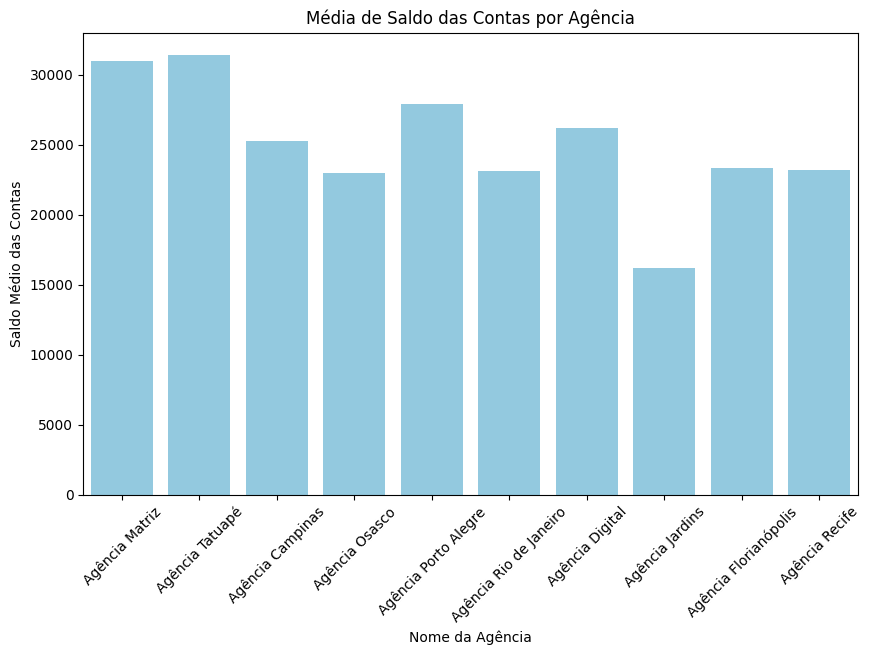

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a m√©dia dos saldos das contas por ag√™ncia
media_saldos_por_agencia = contas_df.groupby('cod_agencia')['saldo_total'].mean()
# Mapeia o c√≥digo da ag√™ncia para o nome da ag√™ncia
media_saldos_por_agencia.index = media_saldos_por_agencia.index.map(nomes_agencias)

# Plotagem do gr√°fico
plt.figure(figsize=(10, 6))
sns.barplot(x=media_saldos_por_agencia.index, y=media_saldos_por_agencia.values, color='skyblue')
plt.xlabel('Nome da Ag√™ncia')
plt.ylabel('Saldo M√©dio das Contas')
plt.title('M√©dia de Saldo das Contas por Ag√™ncia')
plt.xticks(rotation=45)

# Obtendo o t√≠tulo do gr√°fico
titulo_grafico = plt.gca().get_title()

# Salvando a imagem com o nome do t√≠tulo e uma resolu√ß√£o maior
nome_arquivo = titulo_grafico.replace(' ', '_') + '.png'
plt.savefig(nome_arquivo, bbox_inches='tight', dpi=300)  # Especificando uma resolu√ß√£o maior e bbox_inches='tight' para evitar cortes

plt.show()


- 3.2 Identifica√ß√£o de Oportunidades de Neg√≥cio:

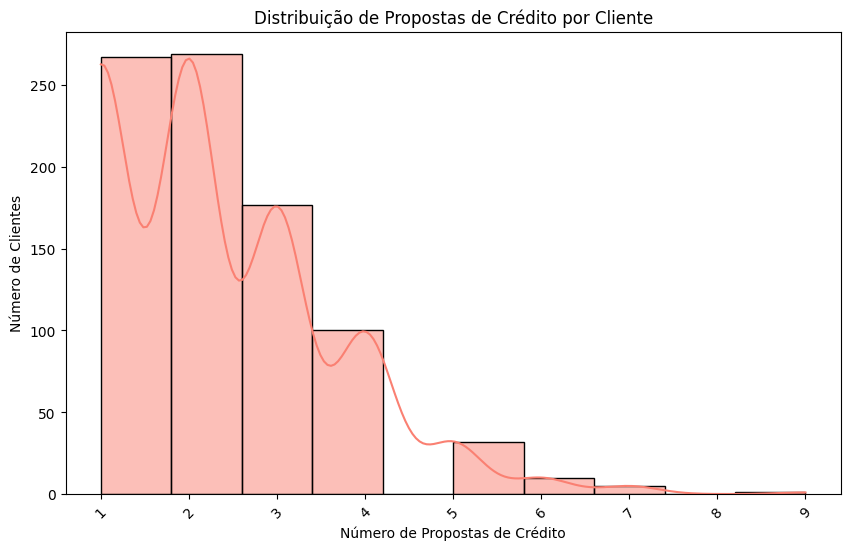

In [ ]:
# Contagem de propostas de cr√©dito por cliente
contagem_propostas_por_cliente = propostas_credito_df['cod_cliente'].value_counts()
# Mapeia o c√≥digo da ag√™ncia para o nome da ag√™ncia
contagem_propostas_por_cliente.index = contagem_propostas_por_cliente.index.map(nomes_agencias)

# Plotagem do gr√°fico
plt.figure(figsize=(10, 6))
sns.histplot(contagem_propostas_por_cliente, bins=10, kde=True, color='salmon')
plt.xlabel('N√∫mero de Propostas de Cr√©dito')
plt.ylabel('N√∫mero de Clientes')
plt.title('Distribui√ß√£o de Propostas de Cr√©dito por Cliente')
plt.xticks(rotation=45)

# Obtendo o t√≠tulo do gr√°fico
titulo_grafico = plt.gca().get_title()

# Salvando a imagem com o nome do t√≠tulo e uma resolu√ß√£o maior
nome_arquivo = titulo_grafico.replace(' ', '_') + '.png'
plt.savefig(nome_arquivo, bbox_inches='tight', dpi=300)  # Especificando uma resolu√ß√£o maior e bbox_inches='tight' para evitar cortes

plt.show()


- 3.3 Gest√£o de Riscos:

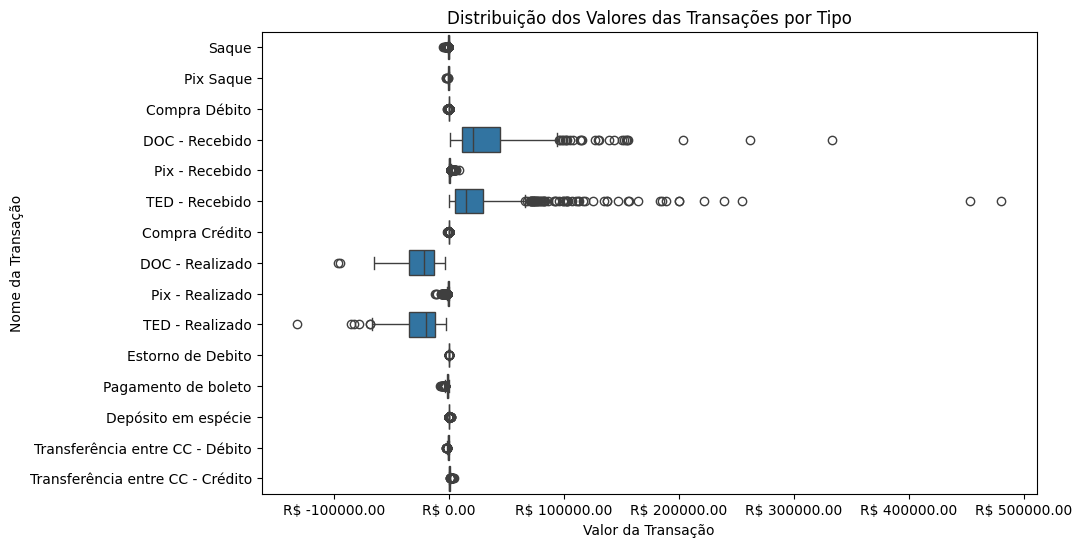

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.boxplot(data=transacoes_df, y='nome_transacao', x='valor_transacao')  # Invertendo os eixos
plt.xlabel('Valor da Transa√ß√£o')
plt.ylabel('Nome da Transa√ß√£o')
plt.title('Distribui√ß√£o dos Valores das Transa√ß√µes por Tipo')

# Formatar o eixo x para mostrar o formato do Real brasileiro
formatter = ticker.FormatStrFormatter('R$ %.2f')
plt.gca().xaxis.set_major_formatter(formatter)

# Ajustando os r√≥tulos do eixo y para evitar sobreposi√ß√£o
nomes_transacoes_unicos = transacoes_df['nome_transacao'].unique()
num_transacoes = len(nomes_transacoes_unicos)
plt.yticks(range(num_transacoes), nomes_transacoes_unicos)

# Obtendo o t√≠tulo do gr√°fico
titulo_grafico = plt.gca().get_title()

# Salvando a imagem com o nome do t√≠tulo e uma resolu√ß√£o maior
nome_arquivo = titulo_grafico.replace(' ', '_') + '.png'
plt.savefig(nome_arquivo, bbox_inches='tight', dpi=300)  # Especificando uma resolu√ß√£o maior e bbox_inches='tight' para evitar cortes

plt.show()



- 3.4 Aumento da Efici√™ncia Operacional

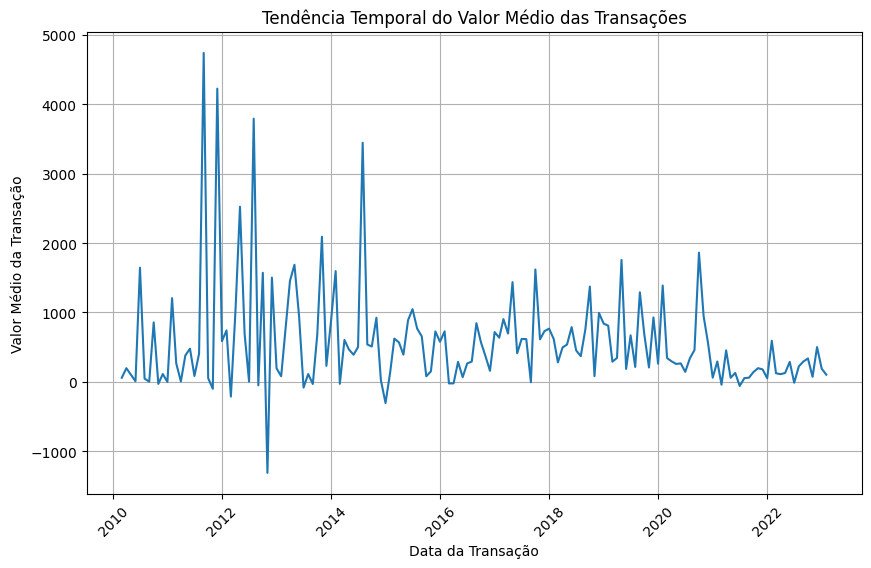

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo a coluna 'data_transacao' para o tipo datetime se necess√°rio
transacoes_df['data_transacao'] = pd.to_datetime(transacoes_df['data_transacao'])

# Agrupando os dados por m√™s e calculando a m√©dia do valor das transa√ß√µes
media_valor_transacao = transacoes_df.resample('M', on='data_transacao')['valor_transacao'].mean()

# Plotando a tend√™ncia temporal do valor m√©dio das transa√ß√µes
plt.figure(figsize=(10, 6))
sns.lineplot(data=media_valor_transacao)
plt.xlabel('Data da Transa√ß√£o')
plt.ylabel('Valor M√©dio da Transa√ß√£o')
plt.title('Tend√™ncia Temporal do Valor M√©dio das Transa√ß√µes')
plt.xticks(rotation=45)
plt.grid(True)

# Obtendo o t√≠tulo do gr√°fico
titulo_grafico = plt.gca().get_title()

# Salvando a imagem com o nome do t√≠tulo e uma resolu√ß√£o maior
nome_arquivo = titulo_grafico.replace(' ', '_') + '.png'
plt.savefig(nome_arquivo, bbox_inches='tight', dpi=300)  # Especificando uma resolu√ß√£o maior e bbox_inches='tight' para evitar cortes

plt.show()


In [ ]:
transacoes_df.columns

Index(['cod_transacao', 'num_conta', 'data_transacao', 'nome_transacao',
       'valor_transacao'],
      dtype='object')